## **Stock Market Analysis and Price Prediction**

## **1. Data Loading and Preprocessing**

#### **Importing Necessary Libraries**

In [ ]:
# #Install Libraries
!pip install ta
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


import warnings
warnings.filterwarnings("ignore")




#### **Loading Dataset**

In [2]:
file_path="AAPL.csv"
df=pd.read_csv(file_path)
print("\033[1mDataset uploaded successfully.\033[0m")

Dataset uploaded successfully.


#### **Dataset Structure**

In [3]:
# Dataset Overview

print("\033[1mDataset Information:\033[0m")
df.info()

print("\n\033[1mFirst five rows of the dataset:\033[0m")
print(df.head())

print("\n\033[1mDataset Shape:\033[0m")
print(df.shape)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB

First five rows of the dataset:
         Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785

#### **Identifying and Handling Missing and Duplicate Data**

In [4]:
# Check for Missing or Null Values
print("\n\033[1mMissing Values:\033[0m")
print(df.isnull().sum())


Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Check for Duplicate Values
print("\n\033[1mDuplicate Values:\033[0m")
print(df.duplicated().sum())


Duplicate Values:
0


#### **Basic Statistics**

In [6]:
print("\n\033[1mSummary Statistics:\033[0m")
print(df.describe())


Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08  


#### **Data Preprocessing**

**Datetime Conversion**

In [7]:
# Convert Date to Datetime and Save it to Index
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [8]:
# Display the updated dataset preview
print("\n\033[1mUpdated Dataset Preview:\033[0m")
cleaned_df = df.copy()
print(cleaned_df.head())


Updated Dataset Preview:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


## **2. Exploratory Data Analysis (EDA)**

**Trend Analysis**

**Overall Price Movement**

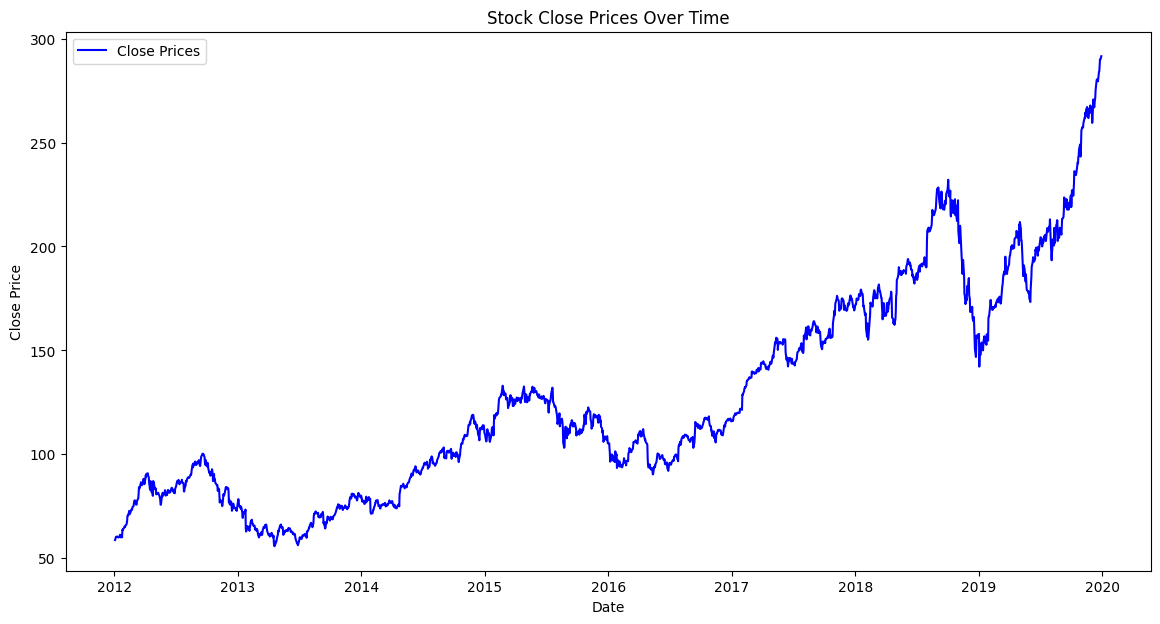

In [ ]:
# Visualize Close Prices
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close Prices', color='blue')
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Moving Averages**

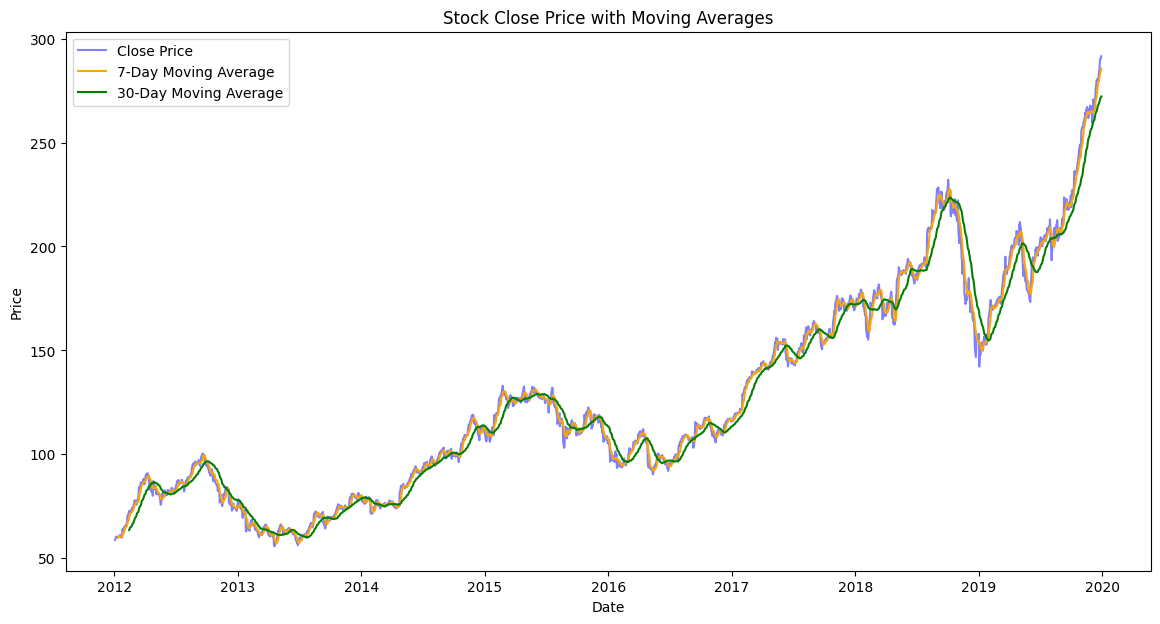

In [ ]:
# Adding moving averages
cleaned_df['7-Day MA'] = cleaned_df['Close'].rolling(window=7).mean()
cleaned_df['30-Day MA'] = cleaned_df['Close'].rolling(window=30).mean()

# Plotting with moving averages
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(cleaned_df.index, cleaned_df['7-Day MA'], label='7-Day Moving Average', color='orange')
plt.plot(cleaned_df.index, cleaned_df['30-Day MA'], label='30-Day Moving Average', color='green')
plt.title('Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Correlation Analysis**

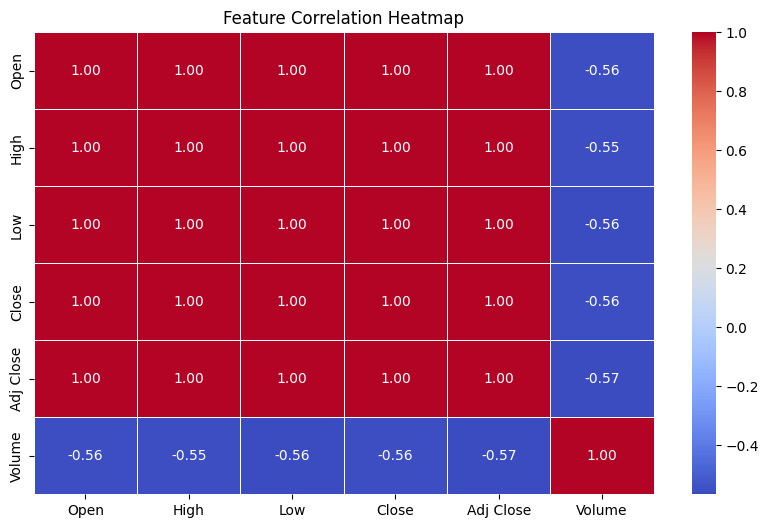

In [11]:
# Calculate correlation matrix
correlation_matrix = cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


**Volatility and Returns**

**Calculate Daily Returns**

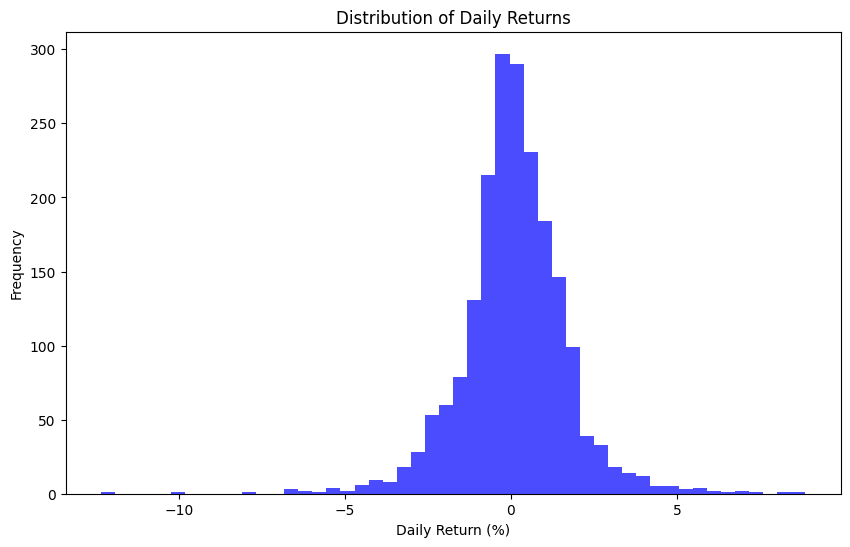

In [ ]:
# Calculate daily returns
cleaned_df['Daily Return'] = cleaned_df['Close'].pct_change() * 100

# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


**Calculate Rolling Volatility**

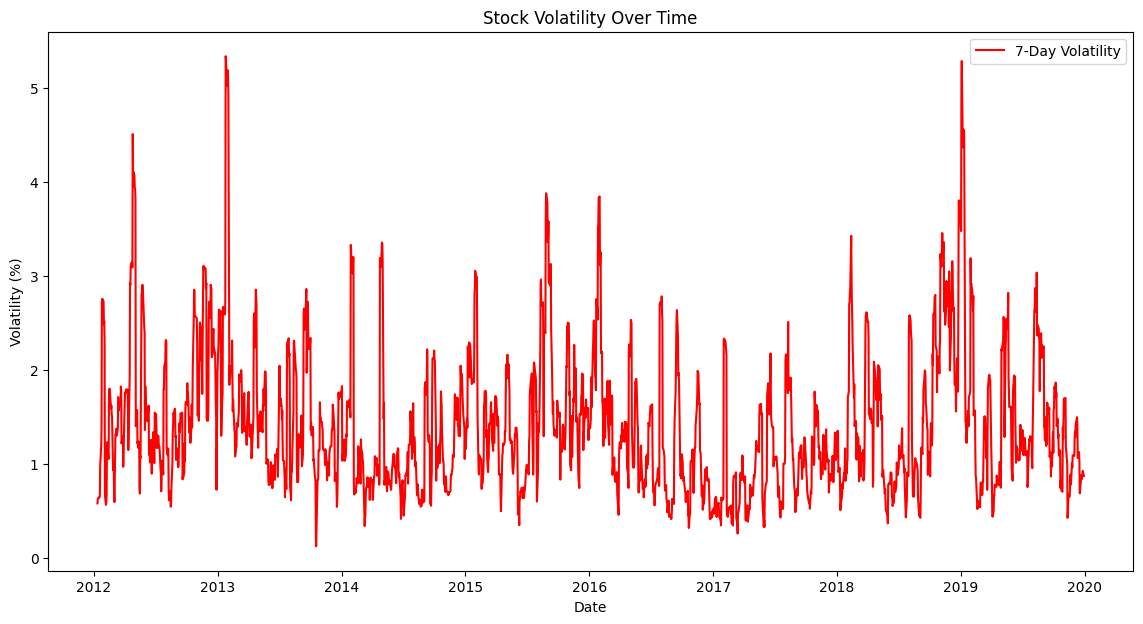

In [ ]:
# Calculate rolling standard deviation (volatility)
cleaned_df['7-Day Volatility'] = cleaned_df['Daily Return'].rolling(window=7).std()

# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['7-Day Volatility'], label='7-Day Volatility', color='red')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()


**Volume Analysis**

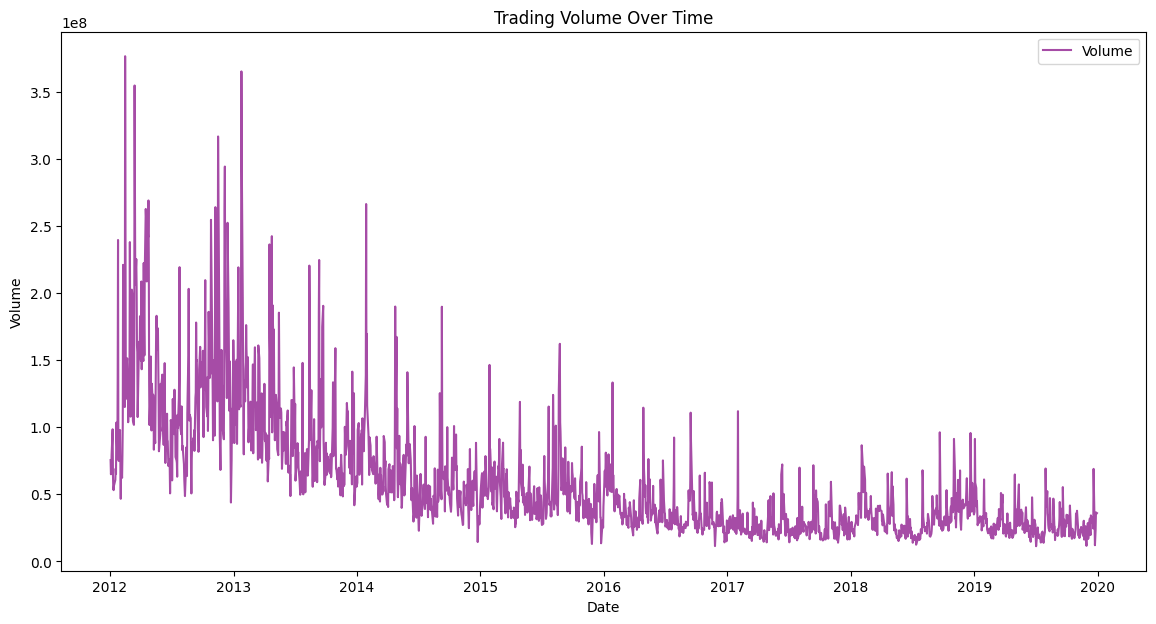

In [ ]:
# Plotting Volume over time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Volume'], label='Volume', color='purple', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


**Overlay Volume with Price**

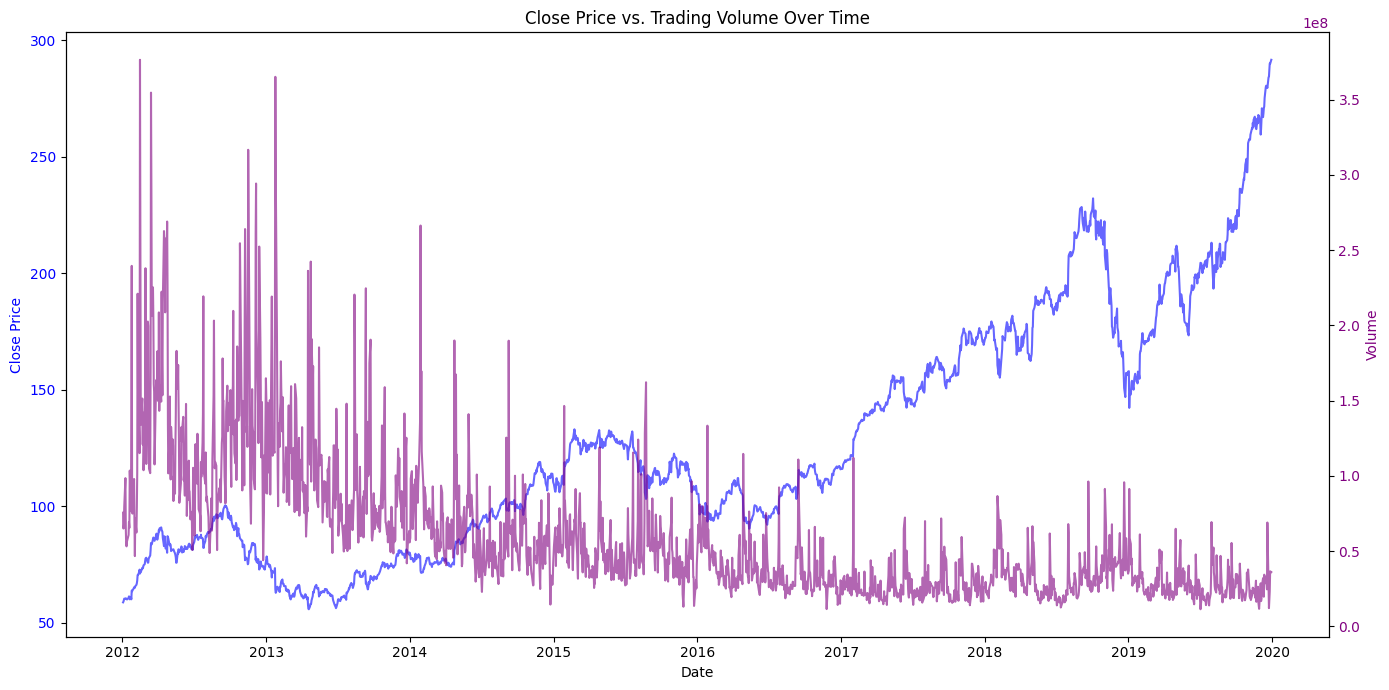

In [ ]:
# Overlaying Volume with Close Price
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Close price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(cleaned_df.index, cleaned_df['Close'], label='Close Price', color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Volume on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='purple')
ax2.plot(cleaned_df.index, cleaned_df['Volume'], label='Volume', color='purple', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='purple')

plt.title('Close Price vs. Trading Volume Over Time')
fig.tight_layout()
plt.show()


**Seasonality**

**Extract Month and Day of the Week**

In [ ]:
# Add Month and Day of the Week columns
cleaned_df['Month'] = cleaned_df.index.month
cleaned_df['DayOfWeek'] = cleaned_df.index.day_name()

# Display the updated dataset
print(cleaned_df[['Month', 'DayOfWeek']].head())


            Month  DayOfWeek
Date                        
2012-01-03      1    Tuesday
2012-01-04      1  Wednesday
2012-01-05      1   Thursday
2012-01-06      1     Friday
2012-01-09      1     Monday


**Analyze Monthly Trends**

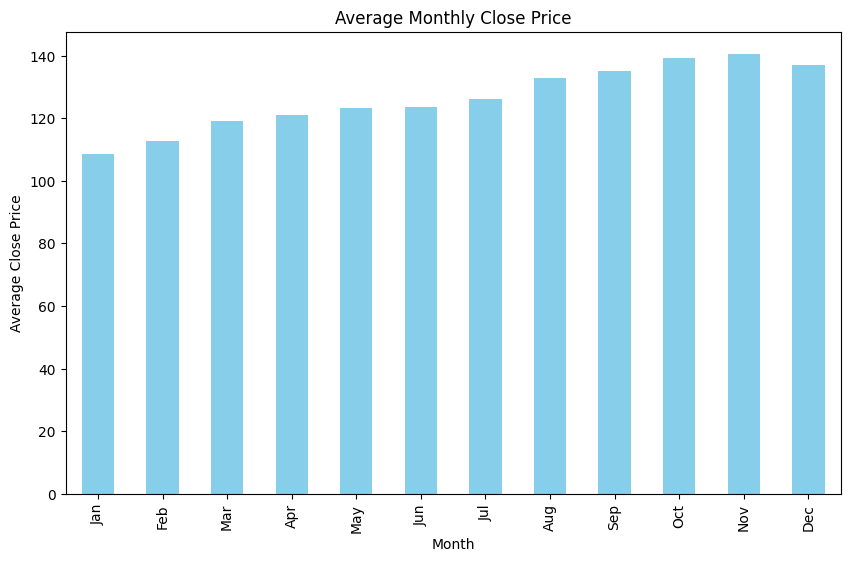

In [17]:
# Calculate average Close price by month
monthly_avg_close = cleaned_df.groupby('Month')['Close'].mean()

# Plot monthly trends
plt.figure(figsize=(10, 6))
monthly_avg_close.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


**Analyze Weekly Trends**

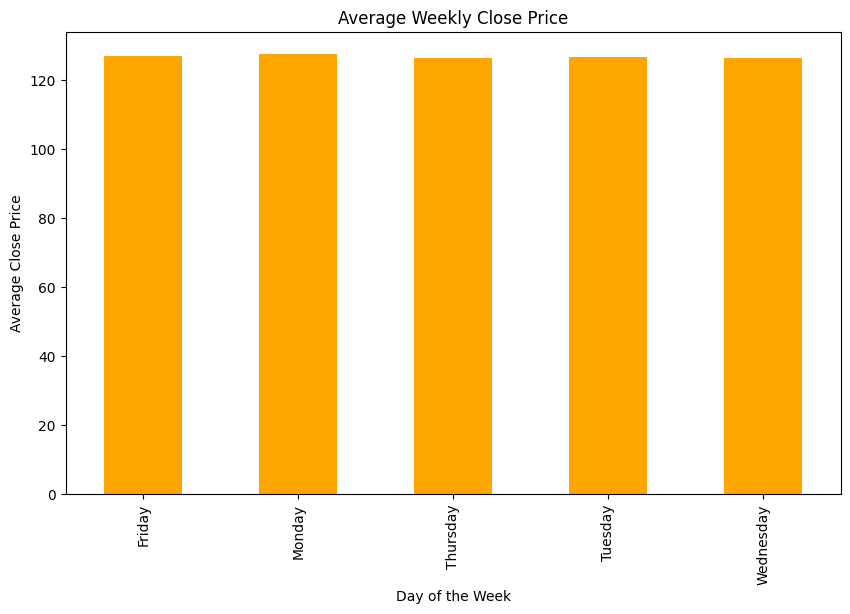

In [18]:
# Calculate average Close price by day of the week
weekly_avg_close = cleaned_df.groupby('DayOfWeek')['Close'].mean()

# Plot weekly trends
plt.figure(figsize=(10, 6))
weekly_avg_close.plot(kind='bar', color='orange')
plt.title('Average Weekly Close Price')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.show()


In [19]:
# Step 1: Handle NaN in rolling features (7-Day MA, 30-Day MA, 7-Day Volatility)
rolling_columns = ['7-Day MA', '30-Day MA', '7-Day Volatility']
for col in rolling_columns:
    # Apply forward-fill first
    cleaned_df[col] = cleaned_df[col].fillna(method='ffill')
    # If any NaN values remain (e.g., at the beginning), apply backward-fill
    cleaned_df[col] = cleaned_df[col].fillna(method='bfill')

# Step 2: Handle NaN in Daily Return
# Forward-fill for continuity
cleaned_df['Daily Return'] = cleaned_df['Daily Return'].fillna(method='ffill')
# Handle remaining NaN (e.g., first row) with backward-fill
cleaned_df['Daily Return'] = cleaned_df['Daily Return'].fillna(method='bfill')

# Step 3: Impute missing values in critical features (Close, Volume)
critical_columns = ['Close', 'Volume']
for col in critical_columns:
    # Impute using the column's mean
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mean())

# Verify no remaining NaN values
print("\n\033[1mRemaining NaN Values by Column:\033[0m")
print(cleaned_df.isna().sum())
print(f"\033[1mFinal dataset shape after handling NaN:\033[0m {cleaned_df.shape}")



Remaining NaN Values by Column:
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
7-Day MA            0
30-Day MA           0
Daily Return        0
7-Day Volatility    0
Month               0
DayOfWeek           0
dtype: int64
Final dataset shape after handling NaN: (2011, 12)


**Outlier Analysis**

**Visualize Outliers Using Box Plot**

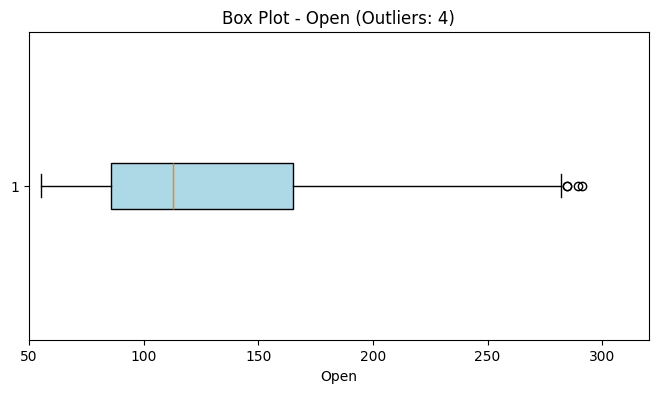

Open Outliers: [284.690002 284.820007 291.119995 289.459991]


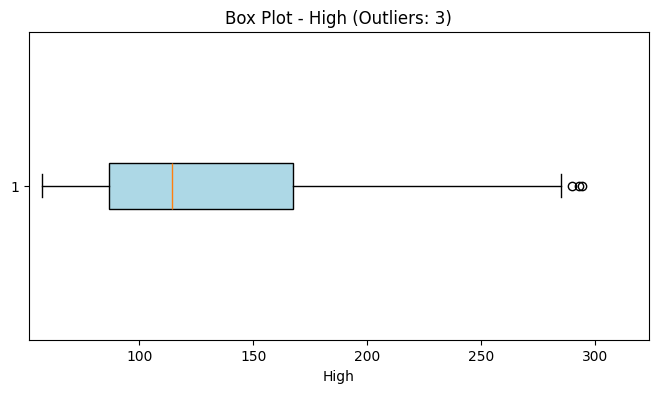

High Outliers: [289.980011 293.970001 292.690002]


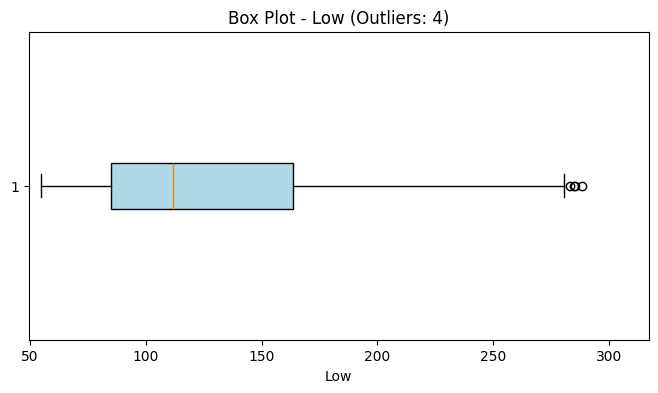

Low Outliers: [282.920013 284.700012 288.119995 285.220001]


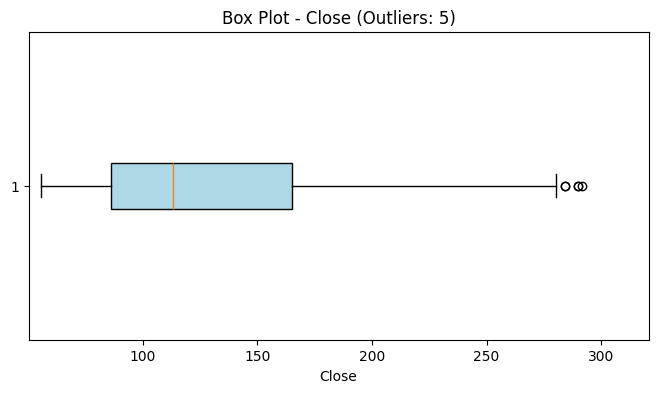

Close Outliers: [284.       284.269989 289.910004 289.799988 291.519989]


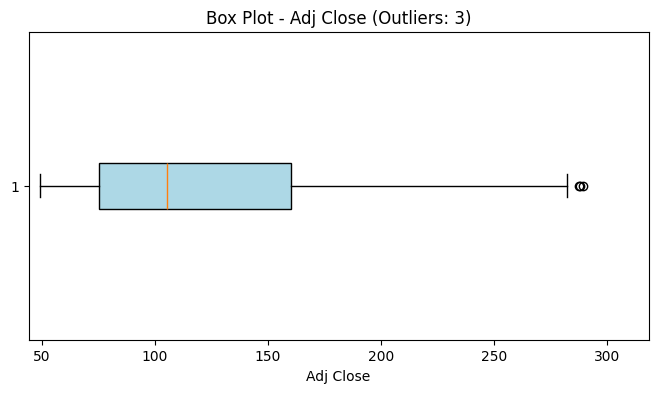

Adj Close Outliers: [287.923645 287.814392 289.522614]


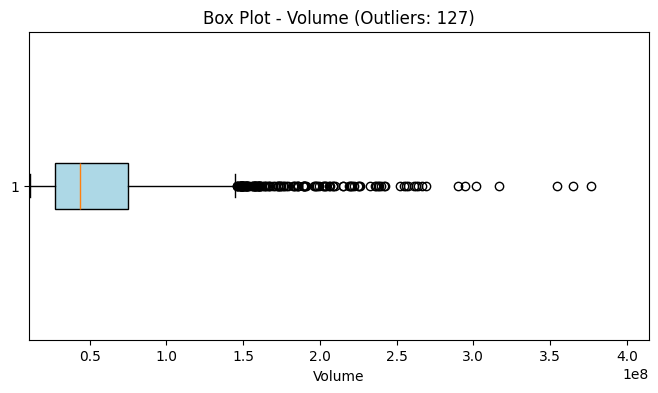

Volume Outliers: [239578500 221053700 157825500 376530000 236138000 151398800 150096800
 238002800 170817500 202281100 202559700 199630200 172713800 354711000
 289929500 206371900 225309000 204165500 161010500 155967700 148935500
 151782400 163865100 152059600 182759500 149587900 208639900 160324500
 149384200 222431300 174153700 153584200 214911200 262696700 256382000
 238632800 208679800 257746300 241632300 269037300 226444400 152749800
 179305000 183073100 157776500 173717600 146224400 147816200 219328200
 153346200 203179900 178058300 149590000 150118500 159941600 148522500
 156998100 148501500 159498500 209649300 186021500 176786400 164081400
 254608200 149843400 198412200 264036500 232478400 197477700 316723400
 205829400 160688500 157644900 261159500 294303100 196760200 157621100
 148086400 156314900 252394800 189401800 156421300 149067100 164873100
 148583400 150286500 183551900 219193100 172701200 215377400 365213100
 302006600 196379400 148426600 176145200 158289600 152263300

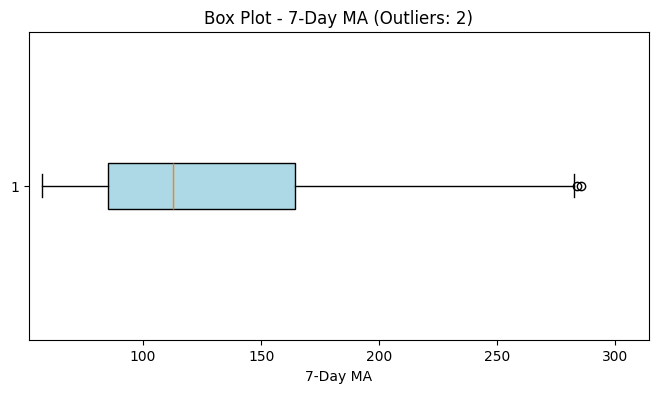

7-Day MA Outliers: [283.88285171 285.56570871]


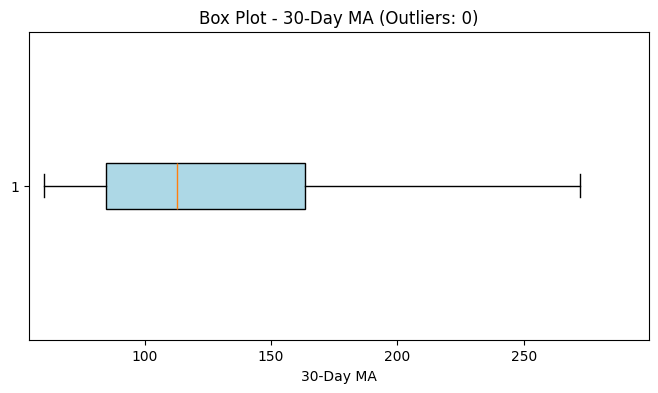

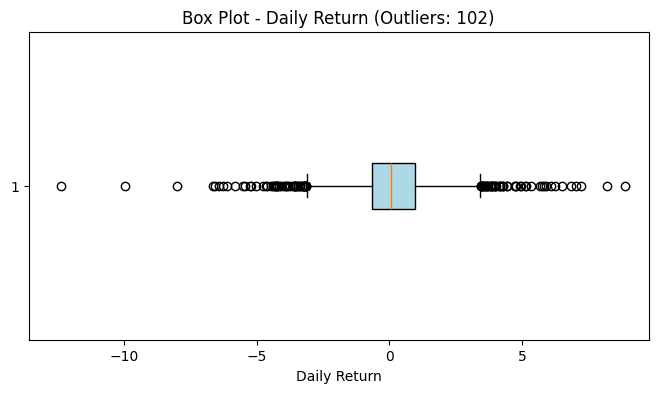

Daily Return Outliers: [  6.2439048    3.4593418    3.7810264   -4.14717773   5.09712755
  -3.43558299   8.87413657  -3.15423356   5.82600939  -4.31837299
  -3.60394327   3.96661029  -3.26009906  -3.30908116  -4.26352683
  -3.62903704   7.21081045  -6.4356983   -3.75691433   4.4310143
  -3.56525199  -3.15495813   4.15088232 -12.35579463   3.50877371
  -5.49925006  -3.38169888   5.13616303   4.75221587  -5.44436662
  -3.17917754   4.96994303   3.83774989  -7.99274085   8.19818909
   3.87279171  -4.22071721  -3.81326486  -3.24560666   3.84222645
  -3.50132544   5.65328849  -4.22944474  -3.20837803   3.63573763
  -5.20381135  -6.11628928   5.73549654  -4.4696709    4.28889246
  -3.19113448   4.12046606  -3.1516986   -4.22045693   5.31671323
  -6.5706572    3.4541398    3.97145198  -6.2577845    3.711887
   6.49632681   3.53867541   6.0980652   -3.35756157  -3.87767521
   4.72508888  -3.56388369   3.58299908  -4.33901481   4.17917681
   4.02787727   4.74718195  -4.09722331   4.41750487   3

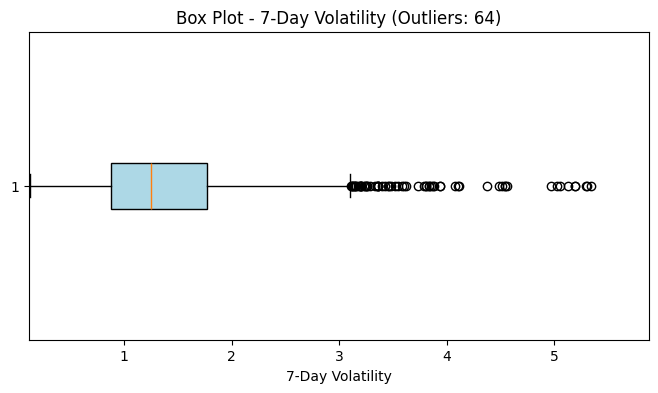

7-Day Volatility Outliers: [3.13366446 3.14761477 4.51210995 4.09961747 4.11036975 4.07302486
 3.93680428 3.93176459 3.8287646  3.10897031 5.34131781 5.30596879
 5.02407452 5.1882507  5.19352081 5.12999853 4.96677909 3.33168446
 3.2881578  3.12036857 3.20383749 3.19799519 3.19125744 3.14828548
 3.25786851 3.35785059 3.34838447 3.17699072 3.59682149 3.88163578
 3.86711408 3.78274158 3.36124193 3.39502663 3.5848609  3.12795269
 3.51918552 3.54932426 3.83218164 3.84770624 3.11394238 3.25745873
 3.24495522 3.42838004 3.23325858 3.20489735 3.45812414 3.45295501
 3.24156555 3.36127033 3.15852404 3.80567528 3.80398225 3.72681933
 3.62353962 3.47920977 5.05419612 5.29028817 4.37123449 4.48872022
 4.55958242 4.53908459 4.5426059  3.18939471]


In [20]:

numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Box plot with adjusted axis for tightly clustered data
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(cleaned_df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    
    # Calculate outliers
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    
    # Set axis limits dynamically
    data_min = cleaned_df[column].min()
    data_max = cleaned_df[column].max()
    plt.xlim([data_min - (0.1 * abs(data_min)), data_max + (0.1 * abs(data_max))])

    # Display outlier values in the title
    plt.title(f'Box Plot - {column} (Outliers: {len(outliers)})', fontsize=12)
    plt.xlabel(column)
    plt.show()

    # Print the actual outlier values
    if len(outliers) > 0:
        print(f"{column} Outliers: {outliers[column].values}")


**Identify Outliers Using IQR Method**

In [21]:
# Define a function to detect outliers for each column
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and display outliers for each column
for column in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers(cleaned_df, column)
    print(f"Column: {column}")
    print(f"  Outliers: {len(outliers)} rows")
    print(f"  Range: {lower_bound} to {upper_bound}")
    print("-" * 30)


Column: Open
  Outliers: 4 rows
  Range: -33.07785749999999 to 284.1507185
------------------------------
Column: High
  Outliers: 3 rows
  Range: -34.32035024999995 to 288.44820374999995
------------------------------
Column: Low
  Outliers: 4 rows
  Range: -32.49642575 to 280.97784824999997
------------------------------
Column: Close
  Outliers: 5 rows
  Range: -32.36214249999999 to 283.8092895
------------------------------
Column: Adj Close
  Outliers: 3 rows
  Range: -52.42897099999999 to 287.532761
------------------------------
Column: Volume
  Outliers: 127 rows
  Range: -43101325.0 to 145397275.0
------------------------------
Column: 7-Day MA
  Outliers: 2 rows
  Range: -33.25055978571427 to 282.9857642142857
------------------------------
Column: 30-Day MA
  Outliers: 0 rows
  Range: -33.664857583333344 to 281.8343812166667
------------------------------
Column: Daily Return
  Outliers: 102 rows
  Range: -3.1209219495487304 to 3.4022837035962623
----------------------------

**Handle Outliers Appropriately**

In [22]:
# Define a function for capping outliers based on IQR
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to Open, High, Low, Close, Adj Close, 7-Day MA, and 7-Day Volatility
capping_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', '7-Day MA', '7-Day Volatility']
for col in capping_columns:
    cap_outliers(cleaned_df, col)
print("\033[1mCapping applied to specified columns.\033[0m")

Capping applied to specified columns.


In [23]:
# Log Transformation for Volume
cleaned_df['Volume_Log'] = np.log1p(cleaned_df['Volume'])
print("\033[1mLog transformation applied to Volume.\033[0m")

# Handle remaining outliers for Volume_Log using capping
Q1 = cleaned_df['Volume_Log'].quantile(0.25)
Q3 = cleaned_df['Volume_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the remaining outliers
cleaned_df['Volume_Log'] = cleaned_df['Volume_Log'].clip(lower=lower_bound, upper=upper_bound)
print("\033[1mCapping remaining outliers for Volume_Log.\033[0m")



Log transformation applied to Volume.
Capping remaining outliers for Volume_Log.


In [24]:
# Z-Score Calculation for Daily Return
cleaned_df['Daily_Return_Z'] = zscore(cleaned_df['Daily Return'])

# Capping Daily Return based on Z-Score
z_score_threshold = 3.5  # Relaxed threshold
mean_return = cleaned_df['Daily Return'].mean()
std_return = cleaned_df['Daily Return'].std()

# Cap outliers using relaxed Z-score threshold
cleaned_df['Daily_Return_Capped'] = cleaned_df['Daily Return'].clip(
    lower=mean_return - z_score_threshold * std_return,
    upper=mean_return + z_score_threshold * std_return
)
print("\033[1mDaily Return outliers capped using Z-Score method.\033[0m")

Daily Return outliers capped using Z-Score method.


In [25]:
# Verify remaining outliers for each column
print("\n\033[1mRemaining Outliers in Columns:\033[0m")
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', '7-Day MA', '7-Day Volatility', 'Volume_Log']:
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    print(f"{column}: {len(remaining_outliers)} remaining outliers")


Remaining Outliers in Columns:
Open: 0 remaining outliers
High: 0 remaining outliers
Low: 0 remaining outliers
Close: 0 remaining outliers
Adj Close: 0 remaining outliers
7-Day MA: 0 remaining outliers
7-Day Volatility: 0 remaining outliers
Volume_Log: 0 remaining outliers


In [26]:
# Display total number of rows before and after outlier handling
before_outliers = len(df)
after_outliers = len(cleaned_df)

print(f"\033[1mTotal number of rows before outlier handling:\033[0m {before_outliers}")
print(f"\033[1mTotal number of rows after outlier handling:\033[0m {after_outliers}")
print(f"\033[1mTotal rows removed:\033[0m {before_outliers - after_outliers}")


Total number of rows before outlier handling: 2011
Total number of rows after outlier handling: 2011
Total rows removed: 0


**Final Dataset Validation**

In [27]:
# Check for null values
null_values = cleaned_df.isnull().sum()

# Check data types
data_types = cleaned_df.dtypes

# Check range of values
range_values = cleaned_df.describe()

print("\033[1mNull Values in Cleaned Data:\033[0m")
print(null_values)
print("\n\033[1mData Types in Cleaned Data:\033[0m")
print(data_types)
print("\n\033[1mRange of Values in Cleaned Data:\033[0m")
print(range_values)


Null Values in Cleaned Data:
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
7-Day MA               0
30-Day MA              0
Daily Return           0
7-Day Volatility       0
Month                  0
DayOfWeek              0
Volume_Log             0
Daily_Return_Z         0
Daily_Return_Capped    0
dtype: int64

Data Types in Cleaned Data:
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
7-Day MA               float64
30-Day MA              float64
Daily Return           float64
7-Day Volatility       float64
Month                    int32
DayOfWeek               object
Volume_Log             float64
Daily_Return_Z         float64
Daily_Return_Capped    float64
dtype: object

Range of Values in Cleaned Data:
              Open         High          

**Visualizations for Additional Insights**

**Stock Price Analysis**

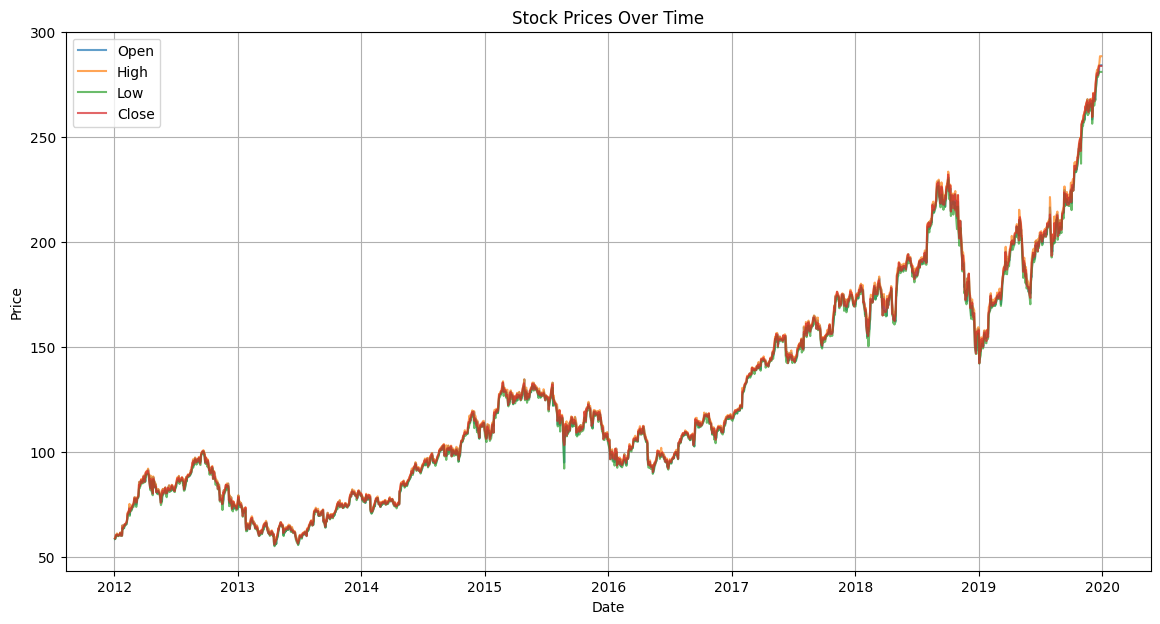

In [28]:
# Plot Open, High, Low, and Close prices over time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Open'], label='Open', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['High'], label='High', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['Low'], label='Low', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close', alpha=0.7)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Moving Averages**

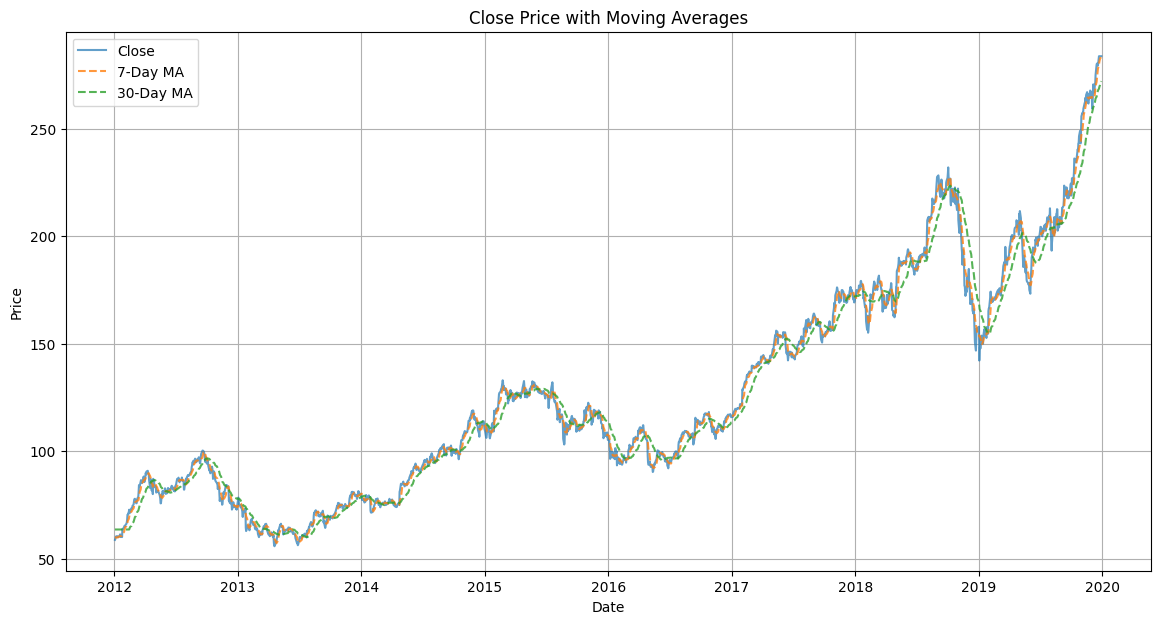

In [29]:
# Plot Close price with 7-Day and 30-Day Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['7-Day MA'], label='7-Day MA', linestyle='--', alpha=0.8)
plt.plot(cleaned_df.index, cleaned_df['30-Day MA'], label='30-Day MA', linestyle='--', alpha=0.8)
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Volume Analysis**

**Volume Over Time**

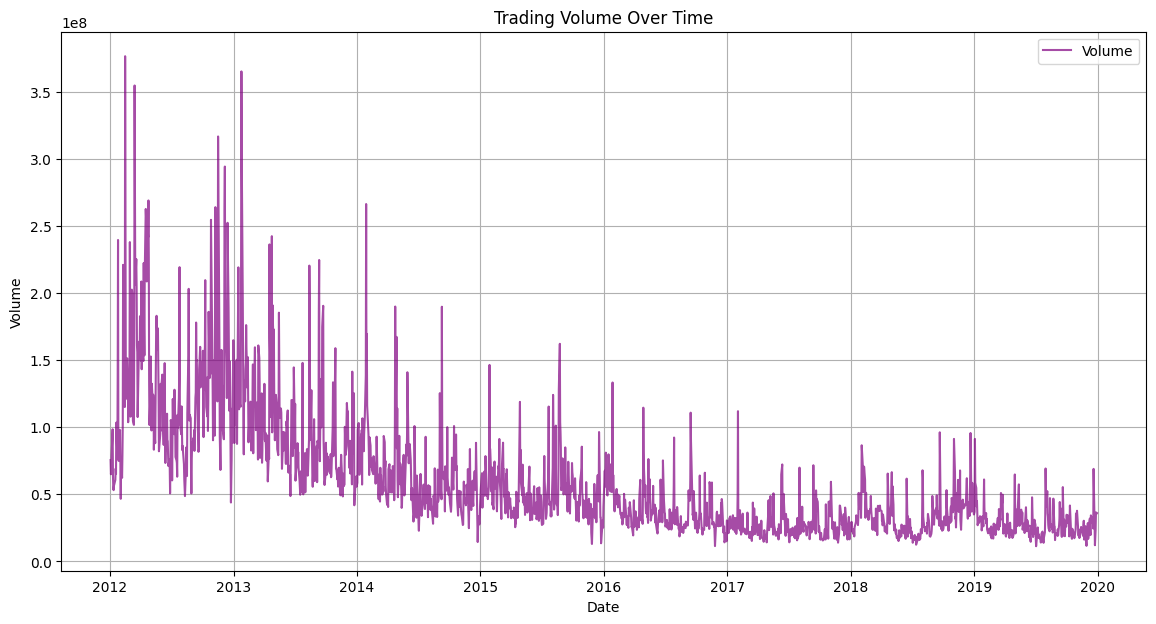

In [30]:
# Line plot for Volume
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Volume'], label='Volume', color='purple', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


**Histogram of Log Transformed Volume**

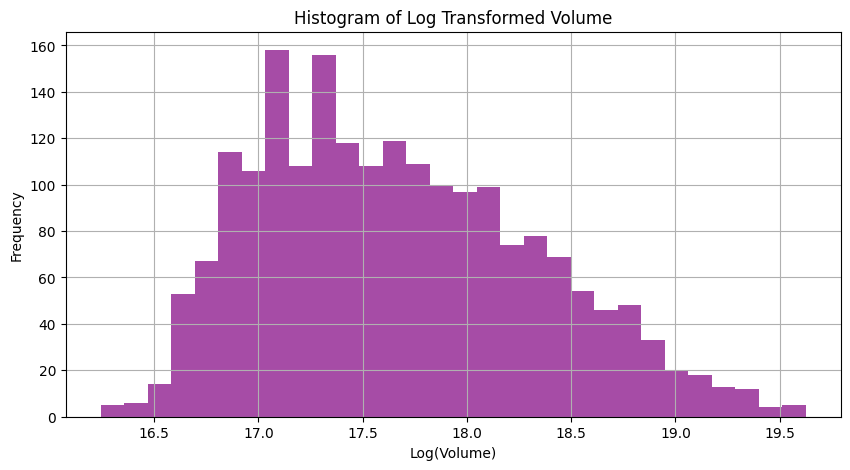

In [31]:
# Histogram of Volume_Log
plt.figure(figsize=(10, 5))
plt.hist(cleaned_df['Volume_Log'], bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Log Transformed Volume')
plt.xlabel('Log(Volume)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Daily Return**

**Histogram of Daily Returns**

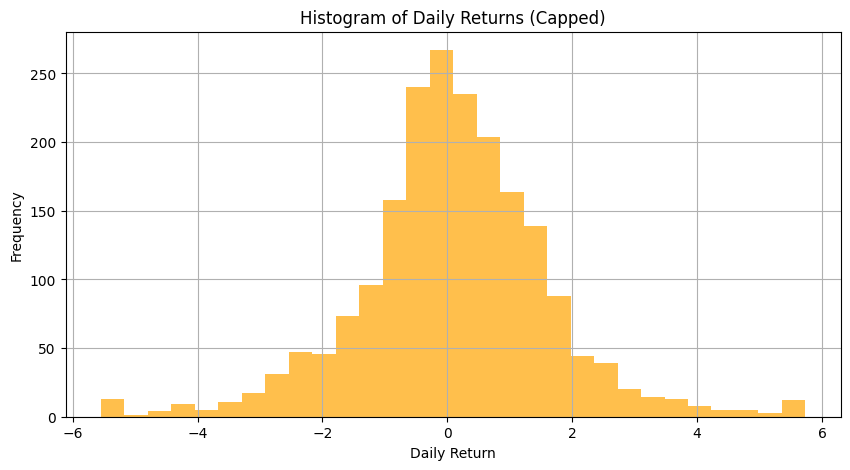

In [32]:
# Histogram of Daily_Return_Capped
plt.figure(figsize=(10, 5))
plt.hist(cleaned_df['Daily_Return_Capped'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of Daily Returns (Capped)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Comparison of Daily_Return_Capped vs. Daily_Return_Z**

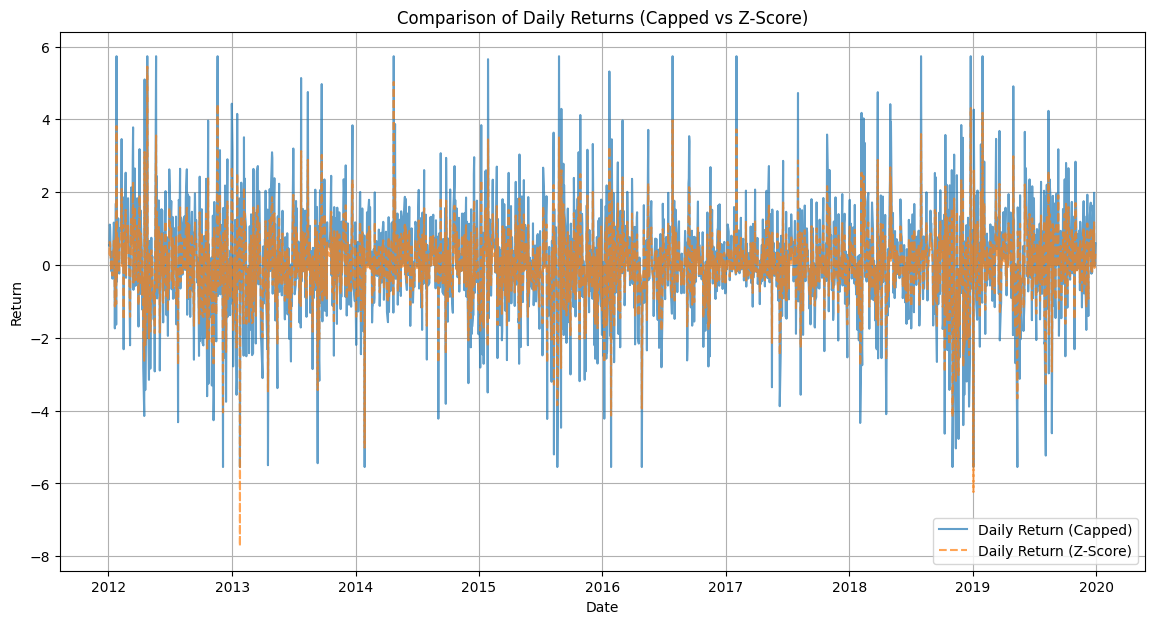

In [33]:
# Line plot comparing capped and Z-score returns
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Daily_Return_Capped'], label='Daily Return (Capped)', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['Daily_Return_Z'], label='Daily Return (Z-Score)', linestyle='--', alpha=0.7)
plt.title('Comparison of Daily Returns (Capped vs Z-Score)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


**Seasonality**

**Monthly Average Close Prices**

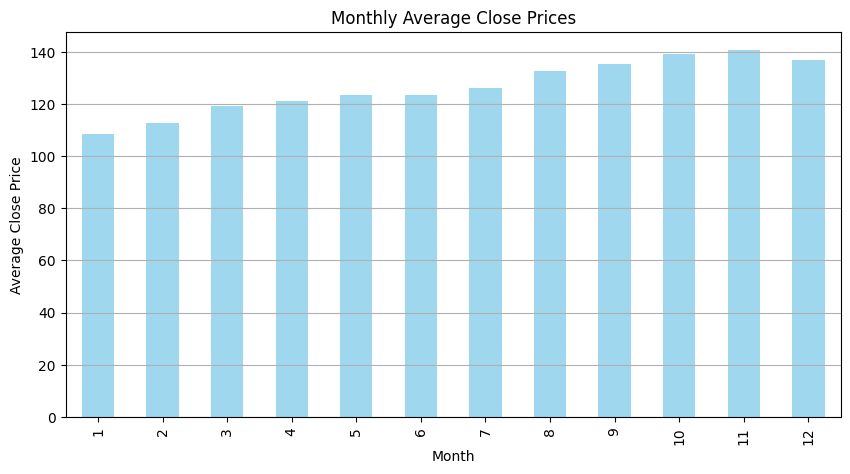

In [34]:
# Bar chart for Monthly Average Close Prices
monthly_avg = cleaned_df.groupby('Month')['Close'].mean()
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Monthly Average Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(axis='y')
plt.show()


**Weekly Average Close Prices**

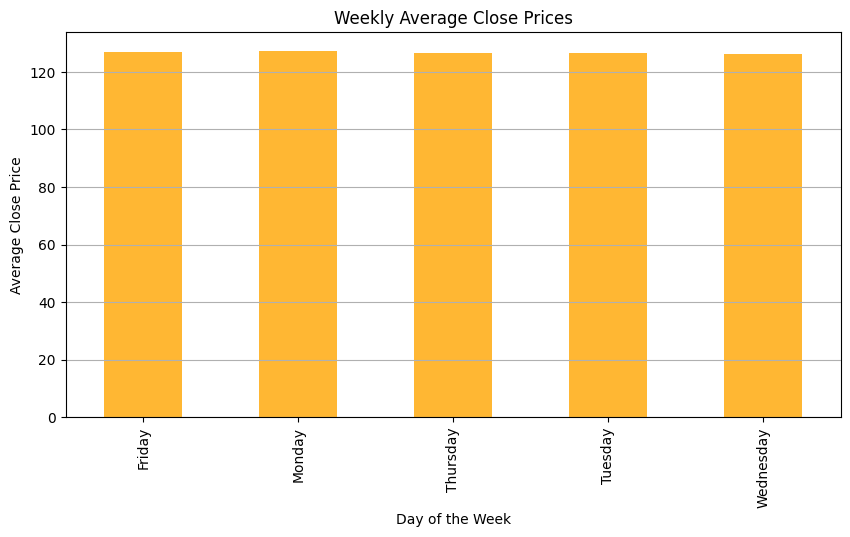

In [35]:
# Bar chart for Weekly Average Close Prices
weekly_avg = cleaned_df.groupby('DayOfWeek')['Close'].mean()
plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Weekly Average Close Prices')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.grid(axis='y')
plt.show()


In [36]:
print(f"\033[1mColumns in Dataset After Handling Outliers:\033[0m\n{cleaned_df.columns}")
print(f"\n\033[1mShape of Dataset After Handling Outliers:\033[0m\n{cleaned_df.shape}")

Columns in Dataset After Handling Outliers:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '7-Day MA',
       '30-Day MA', 'Daily Return', '7-Day Volatility', 'Month', 'DayOfWeek',
       'Volume_Log', 'Daily_Return_Z', 'Daily_Return_Capped'],
      dtype='object')

Shape of Dataset After Handling Outliers:
(2011, 15)


## **3. Feature Engineering**

In [37]:
# Add Lagged Features
cleaned_df['Close_Lag1'] = cleaned_df['Close'].shift(1)
cleaned_df['Close_Lag2'] = cleaned_df['Close'].shift(2)

# Drop rows with NaN values caused by lagged features
cleaned_df.dropna(inplace=True)

# Display the updated feature set
print("\033[1mFeature Set After Feature Engineering:\033[0m")
print(cleaned_df.columns)

# Check the first few rows
print(cleaned_df.head())


Feature Set After Feature Engineering:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '7-Day MA',
       '30-Day MA', 'Daily Return', '7-Day Volatility', 'Month', 'DayOfWeek',
       'Volume_Log', 'Daily_Return_Z', 'Daily_Return_Capped', 'Close_Lag1',
       'Close_Lag2'],
      dtype='object')
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   
2012-01-10  60.844284  60.857143  60.214287  60.462856  52.248333  64549100   
2012-01-11  60.382858  60.407143  59.901428  60.364285  52.163139  53771200   

             7-Day MA  30-Day MA  Daily Return  7-Day Volatility  Month  \
Date                                                        

**Feature Selection**

**Correlation Analysis**

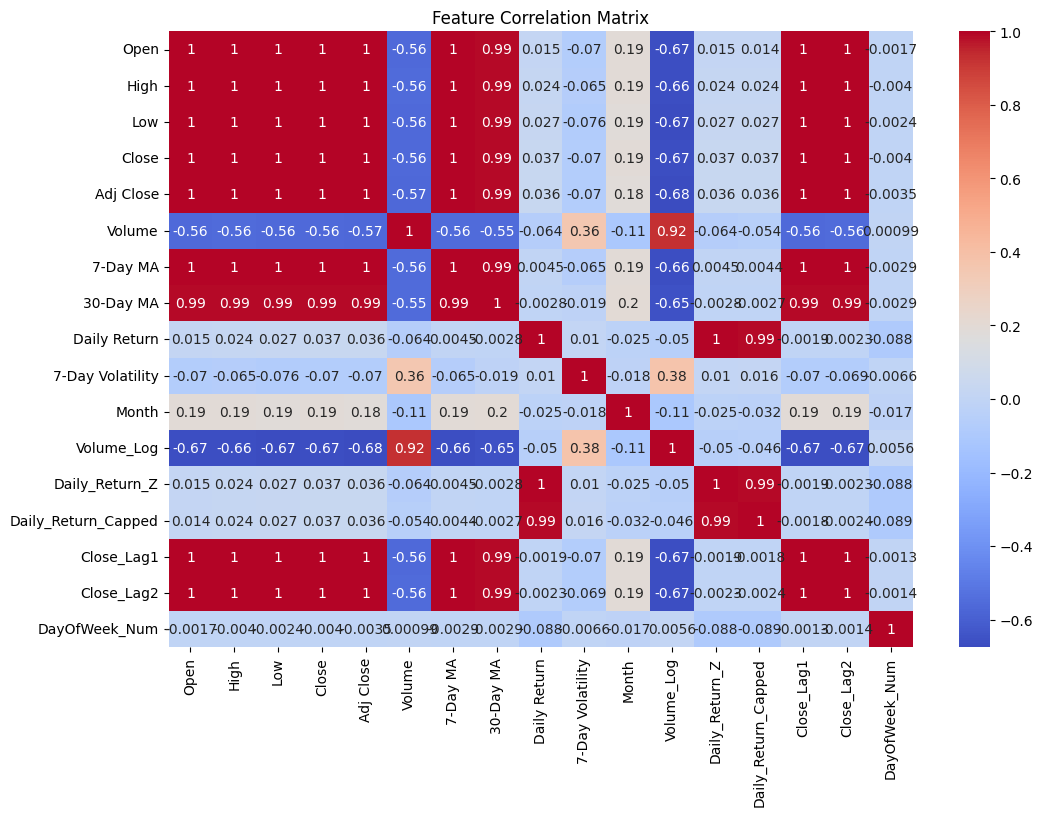

In [38]:
# Map DayOfWeek to numerical values
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 
               'Thursday': 3, 'Friday': 4}
cleaned_df['DayOfWeek_Num'] = cleaned_df['DayOfWeek'].map(day_mapping)

cleaned_df.drop(columns=['DayOfWeek'], inplace=True)

# Correlation Matrix

corr_matrix = cleaned_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


**Variance Inflation Factor (VIF)**

In [39]:

# Select only numerical features for VIF calculation
numerical_features = cleaned_df[['Open', 'High', 'Low', 'Close_Lag1', 'Close_Lag2', 
                                   'Volume_Log', '7-Day MA', '30-Day MA', 'Daily_Return_Capped', 
                                   '7-Day Volatility']]
vif = pd.DataFrame()
vif['Variable'] = numerical_features.columns
vif['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
print(vif)


              Variable           VIF
0                 Open  35504.331330
1                 High  32686.403055
2                  Low  25900.246127
3           Close_Lag1  29306.124437
4           Close_Lag2   7719.809667
5           Volume_Log     12.126008
6             7-Day MA  11031.739798
7            30-Day MA    952.958654
8  Daily_Return_Capped      4.022349
9     7-Day Volatility      7.594524


**Feature Importance with XGBoost**

In [40]:
# Updated Features and Target
X = cleaned_df[['Open', 'High', 'Low', 'Close_Lag1', 'Close_Lag2', 
                 'Volume_Log', '7-Day MA', '30-Day MA', 
                 'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num']]
y = cleaned_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Feature Importance
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                Feature  Importance
4            Close_Lag2    0.585048
1                  High    0.214837
0                  Open    0.101292
2                   Low    0.097168
6              7-Day MA    0.001214
7             30-Day MA    0.000235
8   Daily_Return_Capped    0.000072
3            Close_Lag1    0.000047
9      7-Day Volatility    0.000027
5            Volume_Log    0.000026
11        DayOfWeek_Num    0.000022
10                Month    0.000012


## 4. Model Development

**Split data into training and test dataset**

In [41]:
# Ensure 'Date' is the index for time-based splitting
cleaned_df['Year'] = cleaned_df.index.year  # Extract year from the Date index

# Split dataset into train and test based on year
train_data = cleaned_df[cleaned_df['Year'] < 2019]
test_data = cleaned_df[cleaned_df['Year'] == 2019]

# Define features and target for train and test sets
X_train = train_data[['Open', 'High', 'Low', 'Volume_Log', '7-Day MA', '30-Day MA', 
                      'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num', 
                      'Close_Lag1', 'Close_Lag2']]
y_train = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Volume_Log', '7-Day MA', '30-Day MA', 
                    'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num', 
                    'Close_Lag1', 'Close_Lag2']]
y_test = test_data['Close']

# Print shapes of the splits
print("\033[1mTraining Features Shape:\033[0m", X_train.shape)
print("\033[1mTest Features Shape:\033[0m", X_test.shape)
print("\033[1mTraining Target Shape:\033[0m", y_train.shape)
print("\033[1mTest Target Shape:\033[0m", y_test.shape)


Training Features Shape: (1758, 12)
Test Features Shape: (251, 12)
Training Target Shape: (1758,)
Test Target Shape: (251,)


### Timeseries Models

**ARIMA ( Autoregressive Integrated Moving Average)**

In [42]:
# Step 1: Ensure Data is Sorted and Split Train-Test Properly
cleaned_df = cleaned_df.sort_index()  

# Split train-test based on date
split_date = "2019-01-01"  
y_train = cleaned_df[cleaned_df.index < split_date]["Close"]
y_test = cleaned_df[cleaned_df.index >= split_date]["Close"]

print(f"\n\033[1mTrain-Test Split\033[0m")
print(f"\033[1mTrain Data Size:\033[0m {y_train.shape[0]} rows")
print(f"\033[1mTest Data Size:\033[0m {y_test.shape[0]} rows")  

# Step 2: Perform ADF Test (Check Stationarity)
result = adfuller(y_train)
print("\n\033[1mADF Test Results:\033[0m")
print(f"\033[1mADF Statistic:\033[0m {result[0]}")
print(f"\033[1mP-value:\033[0m {result[1]}")
print("\033[1mCritical Values:\033[0m", result[4])

if result[1] <= 0.05:
    print("\033[1mThe series is stationary.\033[0m")
else:
    print("\033[1mThe series is not stationary; differencing needed.\033[0m")



Train-Test Split
Train Data Size: 1758 rows
Test Data Size: 251 rows

ADF Test Results:
ADF Statistic: -1.2193433806694707
P-value: 0.6652198219417188
Critical Values: {'1%': -3.4340986745839315, '5%': -2.8631958309688113, '10%': -2.567651515683604}
The series is not stationary; differencing needed.


**Autocorrelation Function (ACF)**

<Figure size 1200x600 with 0 Axes>

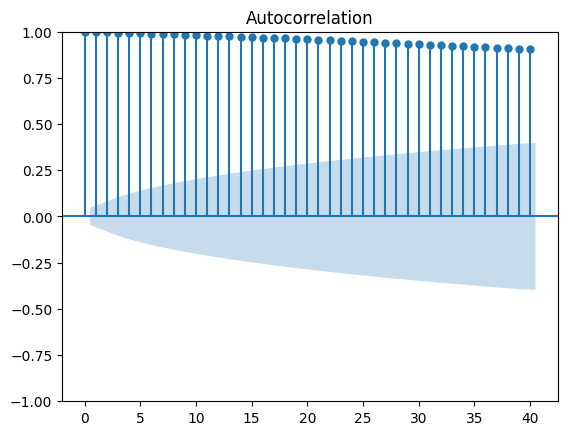

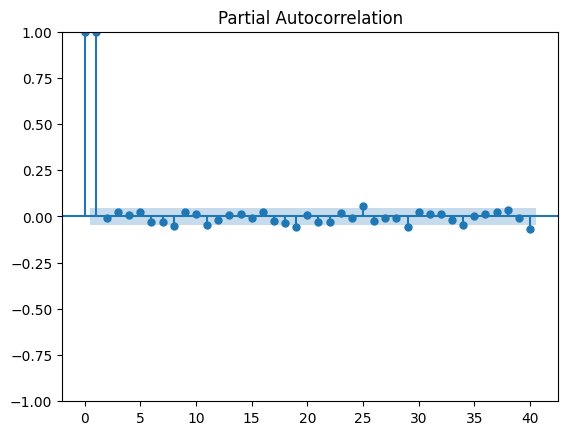

In [43]:
# Step 3: Plot ACF & PACF Before Differencing
plt.figure(figsize=(12, 6))
plot_acf(y_train, lags=40)
plot_pacf(y_train, lags=40)
plt.show()


In [44]:
# Step 4: Apply First Differencing 
y_train_diff = y_train.diff().dropna()

In [45]:
# Step 5: Perform ADF Test Again
result = adfuller(y_train_diff)
print("\n\033[1mADF Test After Differencing:\033[0m")
print(f"\033[1mADF Statistic: {result[0]}\033[0m")
print(f"\033[1mP-value: {result[1]}\033[0m")

if result[1] < 0.05:
    print("\033[1mFirst differencing is sufficient.\033[0m")
else:
    print("\033[1mFurther differencing may be needed.\033[0m")


ADF Test After Differencing:
ADF Statistic: -12.51215369345251
P-value: 2.659649759548553e-23
First differencing is sufficient.


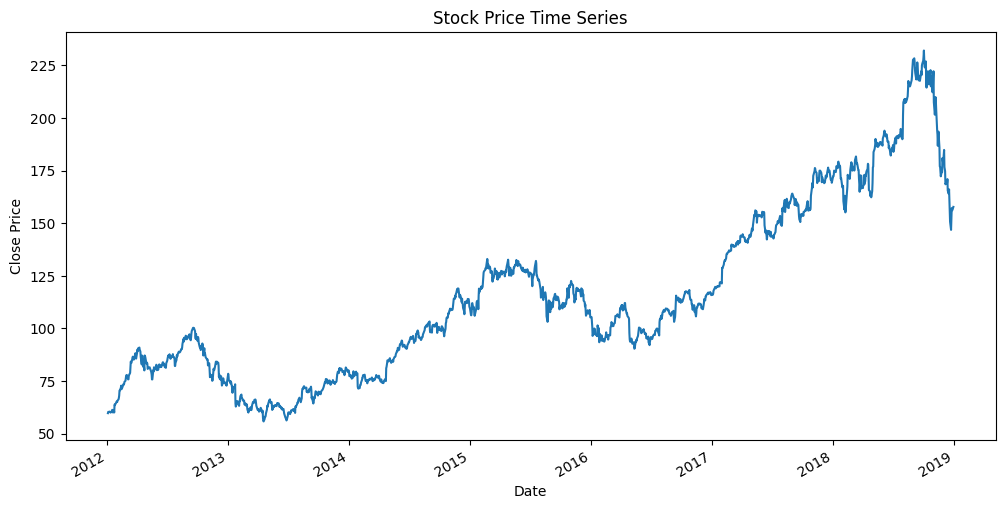

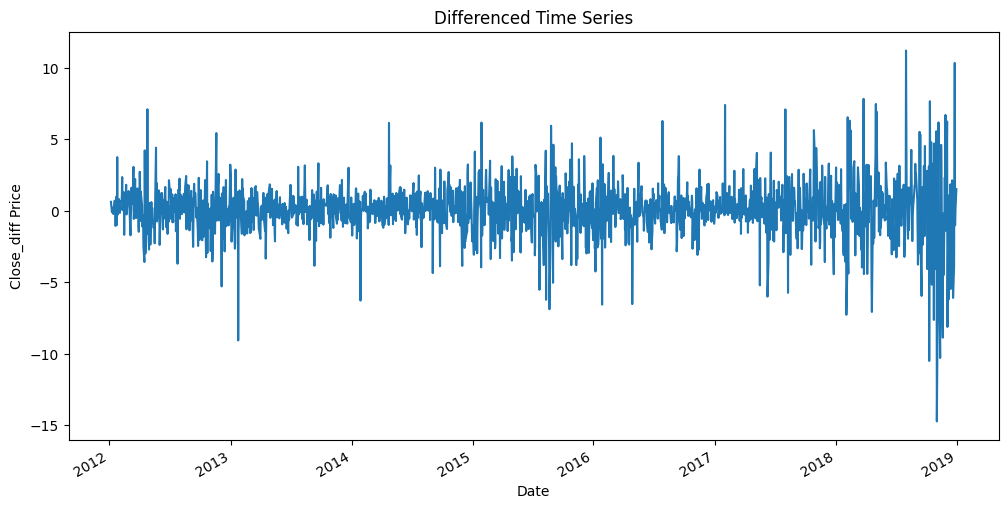

In [46]:
# Step 6: Plot Differenced Series
plt.figure(figsize=(12, 6))
y_train.plot(title="Stock Price Time Series", ylabel="Close Price")
plt.show()

plt.figure(figsize=(12, 6))
y_train_diff.plot(title="Differenced Time Series", ylabel="Close_diff Price")
plt.show()


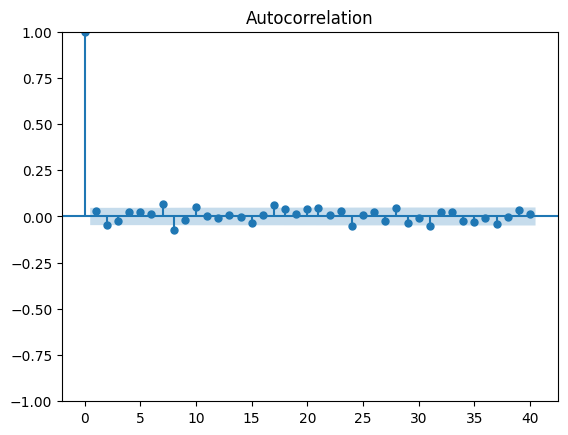

In [47]:
# Step 7: Plot ACF & PACF After Differencing
plot_acf(y_train_diff, lags=40)
plt.show()

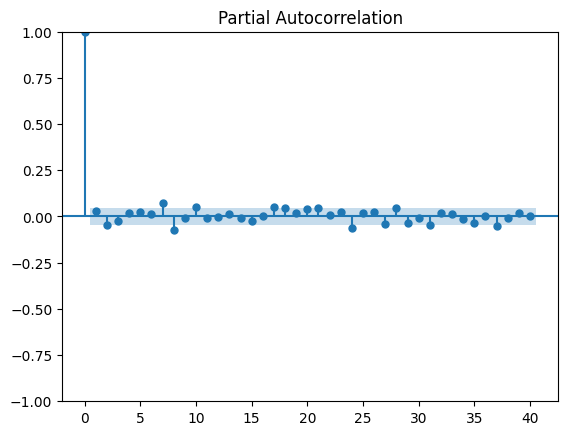

In [48]:
plot_pacf(y_train_diff, lags=40)
plt.show()

In [49]:
# Step 8: Fit ARIMA Model

p, d, q = 1, 1, 1  # Adjust these based on ACF/PACF analysis
model = ARIMA(y_train, order=(p, d, q))
arima_model = model.fit()

print("\n\033[1mARIMA Model Fitted Successfully!\033[0m")

# Summary of the model
print(arima_model.summary())



ARIMA Model Fitted Successfully!
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1758
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3636.622
Date:                Wed, 06 Aug 2025   AIC                           7279.244
Time:                        18:11:08   BIC                           7295.659
Sample:                             0   HQIC                          7285.311
                               - 1758                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8057      0.115     -7.029      0.000      -1.030      -0.581
ma.L1          0.8334      0.107      7.816      0.000       0.624       1.042
sigma2         3.6

In [50]:
# Step 9: Evaluate Predictions
y_test_pred = arima_model.forecast(steps=len(y_test))

arima_mae = mean_absolute_error(y_test, y_test_pred)
arima_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
arima_r2 = r2_score(y_test, y_test_pred)

print("\n\033[1mARIMA Prediction Metrics:\033[0m")
print(f"\033[1mMean Absolute Error (MAE):\033[0m {arima_mae}")
print(f"\033[1mRoot Mean Squared Error (RMSE):\033[0m {arima_rmse}")
print(f"\033[1mR-squared (R²):\033[0m {arima_r2}")



ARIMA Prediction Metrics:
Mean Absolute Error (MAE): 50.87812737724893
Root Mean Squared Error (RMSE): 60.55296673608336
R-squared (R²): -2.18599603650923


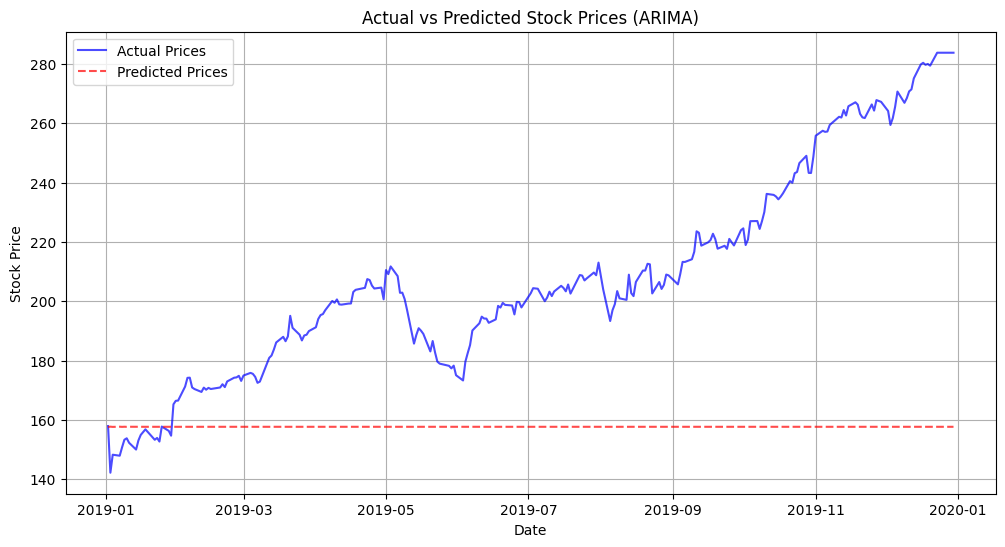

In [51]:
# Step 10: Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue", alpha=0.7)
plt.plot(y_test.index, y_test_pred, label="Predicted Prices", color="red", linestyle="--", alpha=0.7)

plt.title("Actual vs Predicted Stock Prices (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

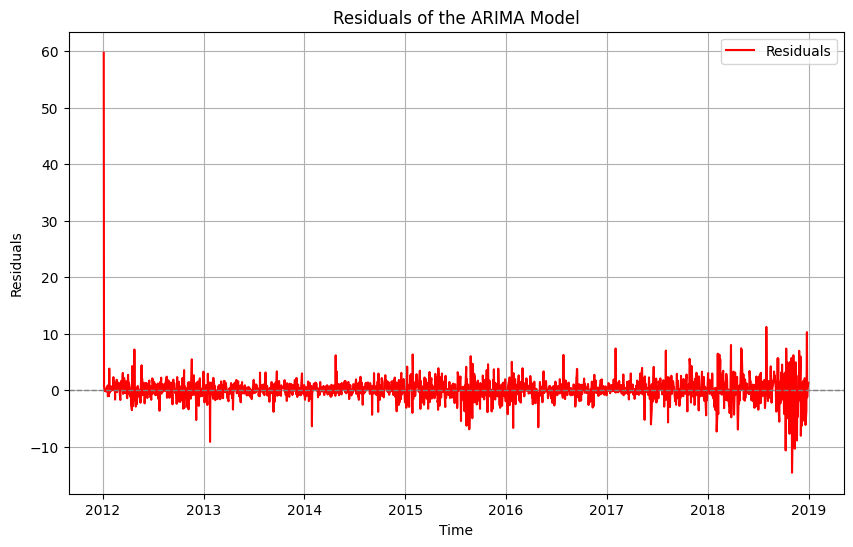

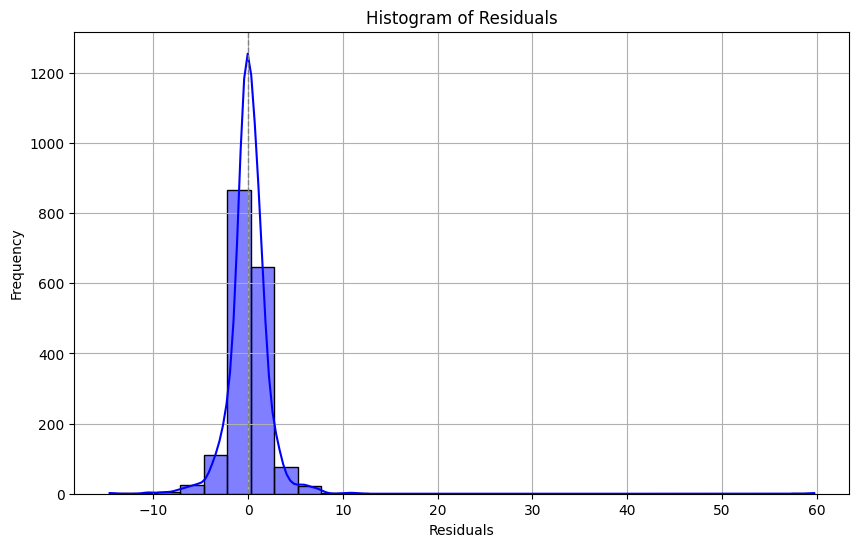

In [52]:
# Step 11: Residual Analysis 
residuals = y_train - arima_model.fittedvalues

# Plot Residuals Over Time
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="red")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Residuals of the ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue", bins=30)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

**SARIMA (Seasonal Autoregressive Integrated Moving Average)**

**Checking for Seasonality**

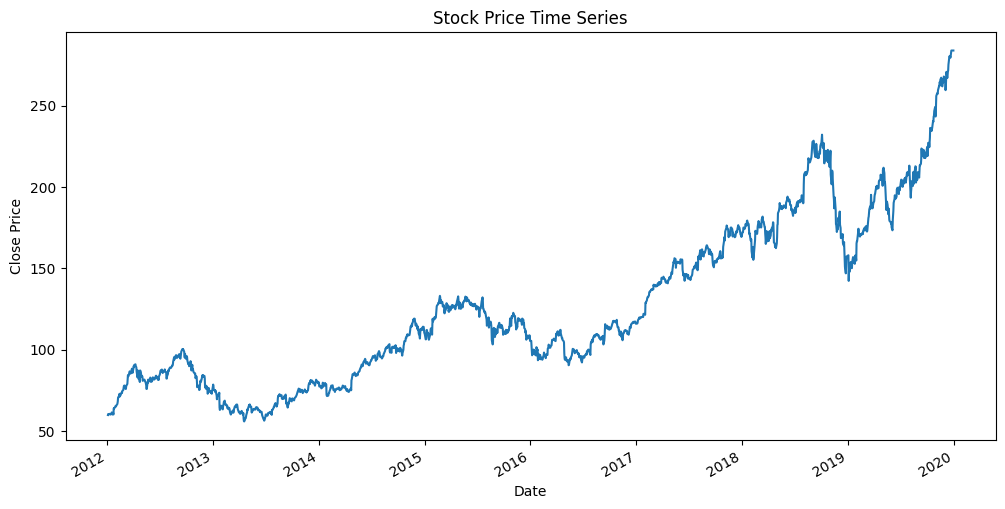

In [53]:
# Load cleaned dataset (Ensure it has a datetime index)
cleaned_df = cleaned_df[['Close']]  # Ensure we're using only the 'Close' column
cleaned_df.index = pd.to_datetime(cleaned_df.index)  # Ensure datetime index

# Detect Seasonality 
plt.figure(figsize=(12, 6))
cleaned_df['Close'].plot()
plt.title("Stock Price Time Series")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

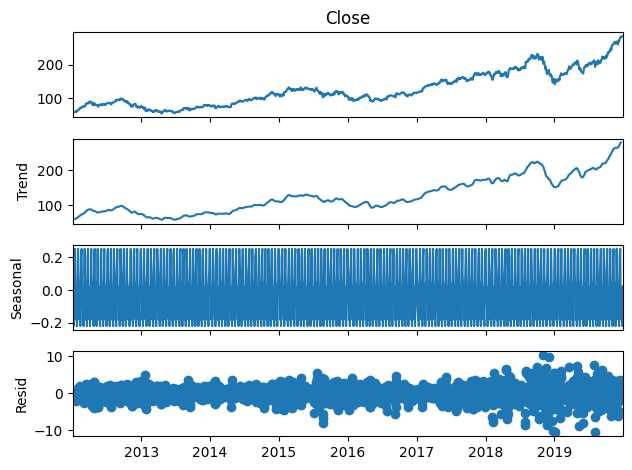

In [54]:
# Perform Seasonal Decomposition
decomposition = seasonal_decompose(cleaned_df['Close'], model='additive', period=12)  # Monthly seasonality
decomposition.plot()
plt.show()

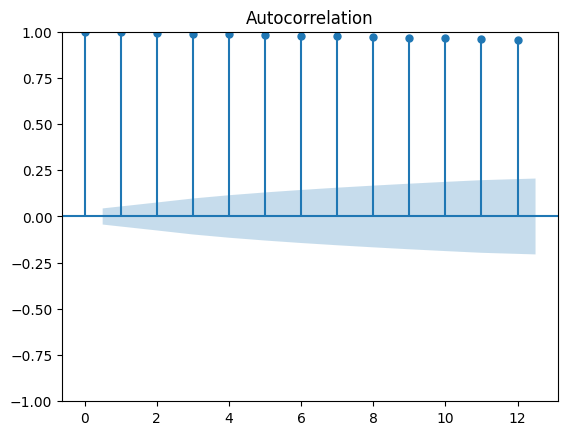

In [55]:
# ACF plot for detecting seasonality
plot_acf(cleaned_df['Close'], lags=12)  # Assuming 252 lags for yearly seasonality in trading data
plt.show()

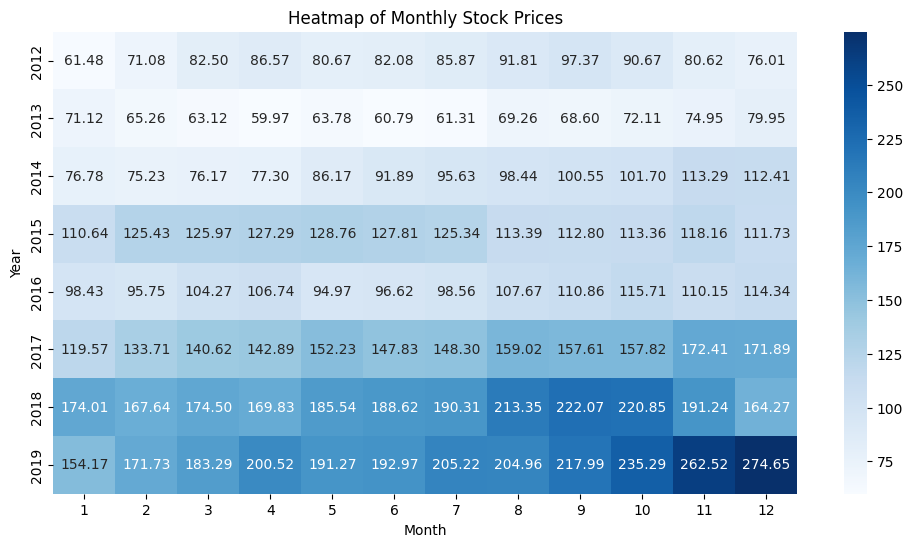

In [56]:
# Create Heatmap of Monthly Stock Prices
cleaned_df['Year'] = cleaned_df.index.year
cleaned_df['Month'] = cleaned_df.index.month

heatmap_data = cleaned_df.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap of Monthly Stock Prices")
plt.show()

In [57]:
train = cleaned_df.loc[cleaned_df.index < '2019-01-01', ['Close']]
test = cleaned_df.loc[cleaned_df.index >= '2019-01-01', ['Close']]

print(f"Train Data Length: {len(train)}")
print(f"Test Data Length: {len(test)}")

if test.empty:
    print("Warning: Test dataset is empty. Re-check train-test split.")
else:
    # Step 2: Define & Train the SARIMA Model (Optimized)
    sarima_model = SARIMAX(
        train['Close'], 
        order=(1, 1, 1), 
        seasonal_order=(1, 1, 1, 12),  # Reduced seasonal order for efficiency
        enforce_stationarity=False, 
        enforce_invertibility=False,
        simple_differencing=True  
    )
    
    # Fit the model with limited iterations
    sarima_model = sarima_model.fit(disp=False, maxiter=30)

    # Print Model Summary
    print("\nSARIMA Model Fitted Successfully!\n")
    print(sarima_model.summary())

    # Step 3: Forecasting 
    forecast_results = sarima_model.get_forecast(steps=len(test))
    forecast_values = forecast_results.predicted_mean

    # Handle NaN values in predictions
    if forecast_values.isna().sum() > 0:
        print("Warning: NaN values detected in SARIMA predictions. Filling missing values.")
        forecast_values.fillna(method='ffill', inplace=True)

Train Data Length: 1758
Test Data Length: 251

SARIMA Model Fitted Successfully!

                                     SARIMAX Results                                      
Dep. Variable:                       D.DS12.Close   No. Observations:                 1745
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -3620.665
Date:                            Wed, 06 Aug 2025   AIC                           7251.330
Time:                                    18:11:10   BIC                           7278.612
Sample:                                         0   HQIC                          7261.421
                                           - 1745                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3634      0.304

In [58]:
# Evaluate Predictions (MAE, RMSE, R²)
sarima_mae = mean_absolute_error(test, forecast_values)
sarima_rmse = np.sqrt(mean_squared_error(test, forecast_values))
sarima_r2 = r2_score(test, forecast_values)

print("\n\033[1mOptimized SARIMA Evaluation Metrics:\033[0m")
print(f"Mean Absolute Error (MAE): {sarima_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse:.4f}")
print(f"R-squared (R²): {sarima_r2:.4f}")


Optimized SARIMA Evaluation Metrics:
Mean Absolute Error (MAE): 207.7864
Root Mean Squared Error (RMSE): 210.5532
R-squared (R²): -37.5211


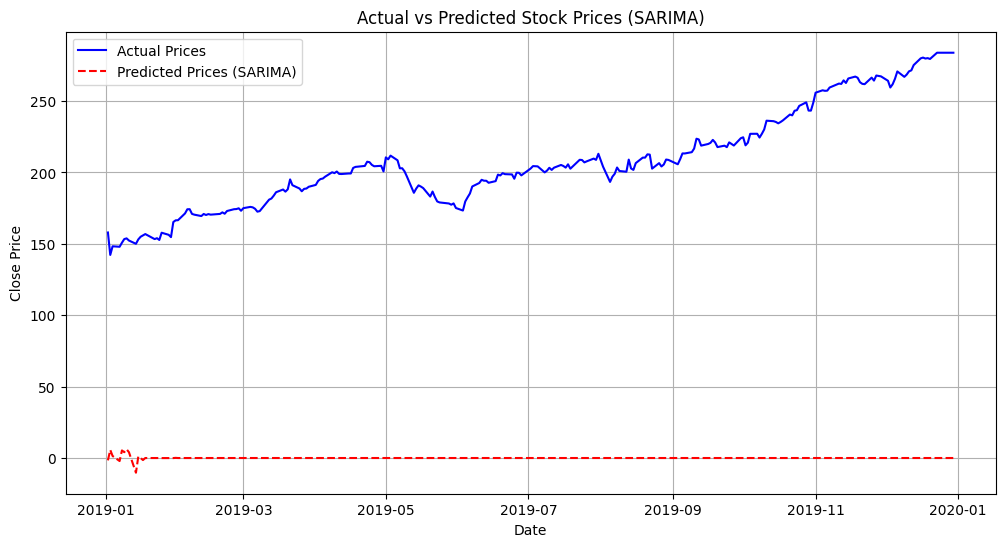

In [59]:
# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast_values, label='Predicted Prices (SARIMA)', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Stock Prices (SARIMA)")
plt.legend()
plt.grid()
plt.show()

**Prophet**

18:11:11 - cmdstanpy - INFO - Chain [1] start processing
18:11:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 27.32617124140219
Root Mean Squared Error (RMSE): 30.065477365086952
R-squared (R²): 0.2145643907068524


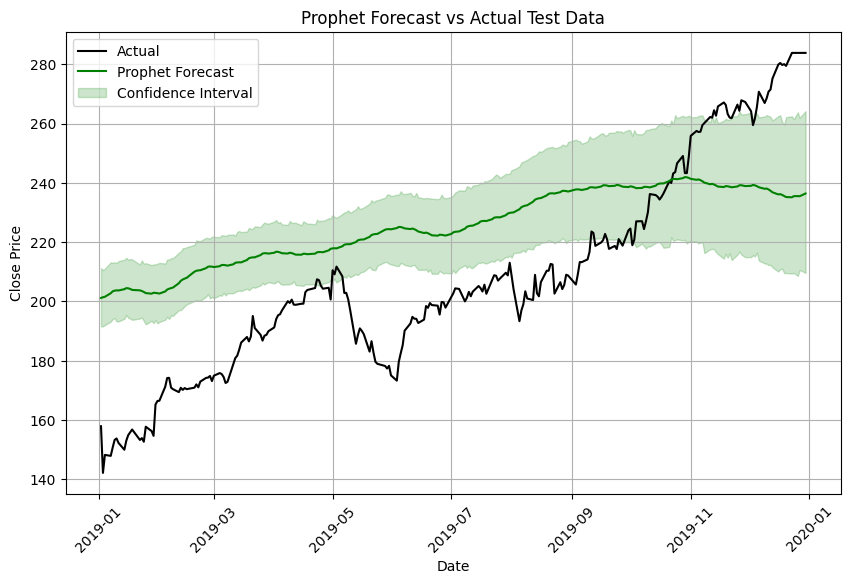

In [60]:
# Step 1: Prepare the Data for Prophet
prophet_df = cleaned_df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y'] 

# Optional: Filter data for specific start date
prophet_df = prophet_df[prophet_df['ds'] >= '2012-01-01']

# Step 2: Split Data into Train and Test
train = prophet_df[prophet_df['ds'] < '2019-01-01']  
test = prophet_df[prophet_df['ds'] >= '2019-01-01']  

# Step 3: Initialize and Train the Prophet Model
prophet_model = Prophet() 
prophet_model.fit(train) 

# Step 4: Predict for Test Data
test_forecast = prophet_model.predict(test[['ds']])  

# Step 5: Evaluate Predictions (MAE, RMSE, R²)
prophet_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
prophet_r2 = r2_score(test['y'], test_forecast['yhat'])

# Print Evaluation Metrics
print(f"\033[1mMean Absolute Error (MAE):\033[0m {prophet_mae}")
print(f"\033[1mRoot Mean Squared Error (RMSE):\033[0m {prophet_rmse}")
print(f"\033[1mR-squared (R²):\033[0m {prophet_r2}")

# Step 6: Visualize Results
# Plot the forecast for the test data
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual', color='black')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Prophet Forecast', color='green')
plt.fill_between(
    test_forecast['ds'],
    test_forecast['yhat_lower'],
    test_forecast['yhat_upper'],
    color='green',
    alpha=0.2,
    label='Confidence Interval'
)
plt.title("Prophet Forecast vs Actual Test Data")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


### Gradient Boosting Model

**XGBoost**

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best Negative MSE Score: -670.6511920073675

XGBoost Model Evaluation Metrics:
Mean Absolute Error (MAE): 7.9402
Root Mean Squared Error (RMSE): 16.3442
R-squared (R²): 0.7679


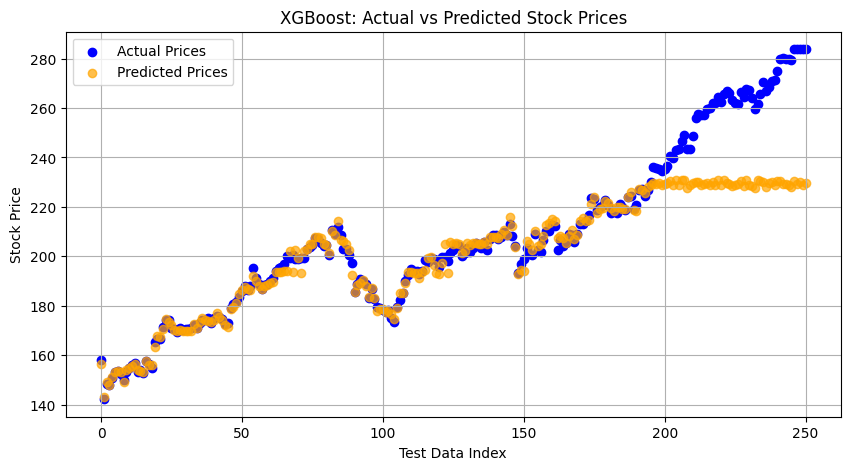

In [61]:
# Ensure X_train and X_test are properly reshaped into 2D arrays
X_train = X_train.values  # Convert DataFrame to NumPy array
X_test = X_test.values    # Convert DataFrame to NumPy array

# Define the XGBoost model
xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Assign the best estimator to xgboost_model
xgboost_model = grid_search.best_estimator_

# Display the best parameters and best score
print("\n\033[1mBest Parameters:\033[0m", grid_search.best_params_)
print("\033[1mBest Negative MSE Score:\033[0m", grid_search.best_score_)

# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"\n\033[1mXGBoost Model Evaluation Metrics:\033[0m")
print(f"Mean Absolute Error (MAE): {xgb_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.4f}")
print(f"R-squared (R²): {xgb_r2:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Prices")
plt.scatter(range(len(y_pred_xgb)), y_pred_xgb, color="orange", label="Predicted Prices", alpha=0.7)
plt.title("XGBoost: Actual vs Predicted Stock Prices")
plt.xlabel("Test Data Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


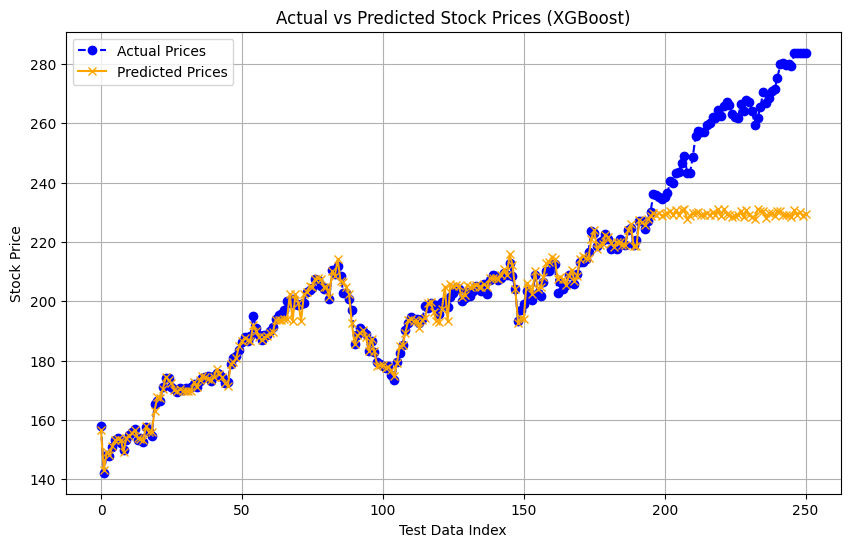

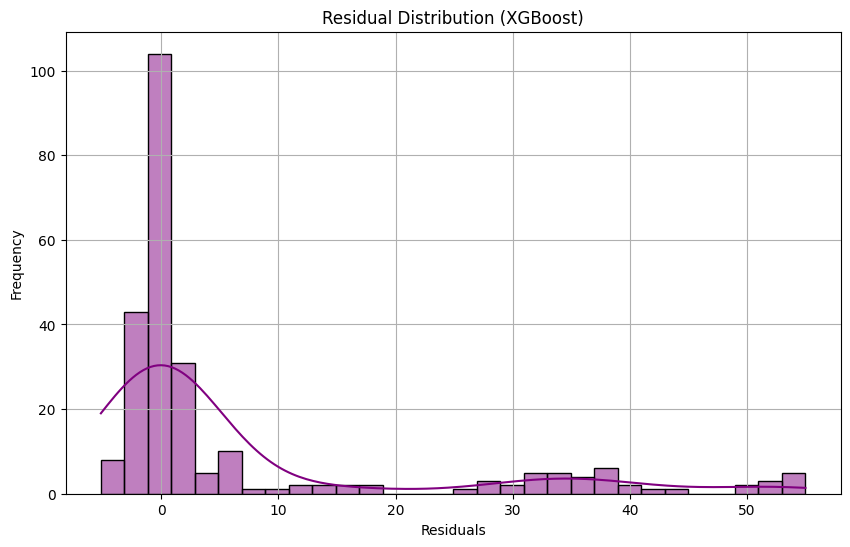

In [62]:
# Ensure 'y_pred_xgb' exists and contains predictions from XGBoost
if 'y_pred_xgb' not in locals():
    raise NameError("The variable 'y_pred_xgb' is not defined. Ensure predictions are stored correctly.")

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", marker='o', color='blue', linestyle='dashed')
plt.plot(y_pred_xgb, label="Predicted Prices", marker='x', color='orange')
plt.title("Actual vs Predicted Stock Prices (XGBoost)")
plt.xlabel("Test Data Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Plot Residuals
residuals_xgb = y_test.values - y_pred_xgb  # Ensure correct subtraction

plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='purple', bins=30)
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


## Ensemble Learning Model

**Random Forest**

Available Columns in Dataset: ['Close', 'Year', 'Month']
Selected Features for Model: ['7-Day MA', '30-Day MA', 'Daily_Return_Capped', '7-Day Volatility', 'Month', 'Close_Lag1', 'Close_Lag2']

Random Forest Model Performance:
MAE: 8.6668
RMSE: 17.1235
R² Score: 0.7452


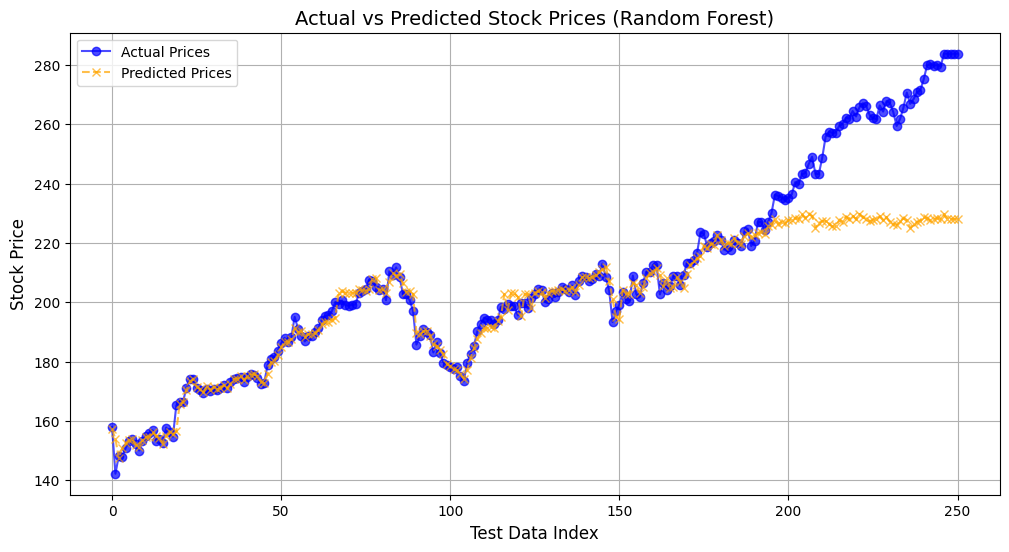

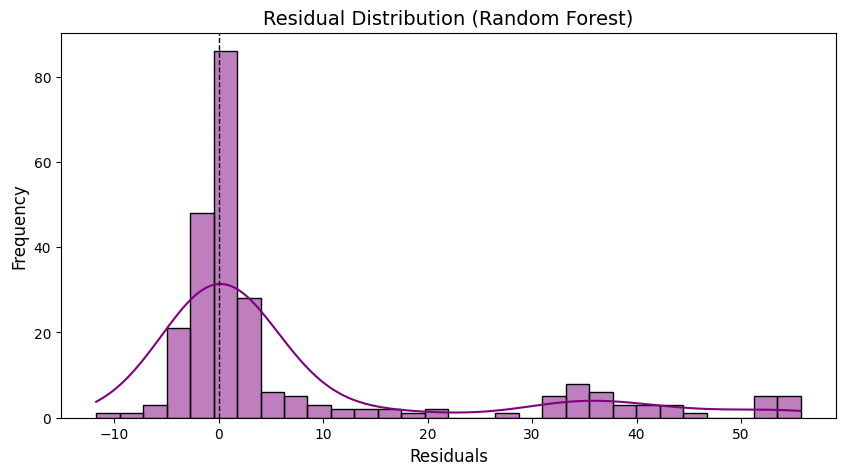

In [63]:
# **Step 1: Print All Available Columns**
print("\033[1mAvailable Columns in Dataset:\033[0m", list(cleaned_df.columns))

# **Step 2: Recompute Missing Features (if needed)**
if 'Close_Lag1' not in cleaned_df.columns:
    cleaned_df['Close_Lag1'] = cleaned_df['Close'].shift(1)

if 'Close_Lag2' not in cleaned_df.columns:
    cleaned_df['Close_Lag2'] = cleaned_df['Close'].shift(2)

if '7-Day MA' not in cleaned_df.columns:
    cleaned_df['7-Day MA'] = cleaned_df['Close'].rolling(window=7).mean()

if '30-Day MA' not in cleaned_df.columns:
    cleaned_df['30-Day MA'] = cleaned_df['Close'].rolling(window=30).mean()

if 'Daily_Return_Capped' not in cleaned_df.columns:
    cleaned_df['Daily_Return_Capped'] = cleaned_df['Close'].pct_change().clip(-0.05, 0.05)  # Capping extreme values

if '7-Day Volatility' not in cleaned_df.columns:
    cleaned_df['7-Day Volatility'] = cleaned_df['Daily_Return_Capped'].rolling(window=7).std()

# Drop NaN values created due to lag features
cleaned_df.dropna(inplace=True)

# **Step 3: Train-Test Split**
cleaned_df['Year'] = cleaned_df.index.year

train_data = cleaned_df[cleaned_df['Year'] < 2019]
test_data = cleaned_df[cleaned_df['Year'] == 2019]

# **Step 4: Select Features & Target**
required_features = ['Open', 'High', 'Low', 'Volume_Log', '7-Day MA', '30-Day MA', 
                     'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num', 
                     'Close_Lag1', 'Close_Lag2']

# Keep only features that exist
available_features = [feature for feature in required_features if feature in cleaned_df.columns]
print("\033[1mSelected Features for Model:\033[0m", available_features)

X_train = train_data[available_features]
y_train = train_data['Close']

X_test = test_data[available_features]
y_test = test_data['Close']

# **Step 5: Train the Model**
if not X_train.empty and not X_test.empty:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # **Step 6: Make Predictions**
    rf_predictions = rf_model.predict(X_test)

    # **Step 7: Evaluate the Model**
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
    rf_r2 = r2_score(y_test, rf_predictions)

    print(f'\n\033[1mRandom Forest Model Performance:\033[0m')
    print(f'MAE: {rf_mae:.4f}')
    print(f'RMSE: {rf_rmse:.4f}')
    print(f'R² Score: {rf_r2:.4f}')

    # **Step 8: Plot Actual vs Predicted Values**
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label="Actual Prices", color="blue", marker="o", alpha=0.7)
    plt.plot(rf_predictions, label="Predicted Prices", color="orange", linestyle="dashed", marker="x", alpha=0.7)
    plt.title("Actual vs Predicted Stock Prices (Random Forest)", fontsize=14)
    plt.xlabel("Test Data Index", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    # **Step 9: Plot Residual Distribution**
    residuals = y_test.values - rf_predictions
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, bins=30, kde=True, color="purple")
    plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
    plt.title("Residual Distribution (Random Forest)", fontsize=14)
    plt.xlabel("Residuals", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

else:
    print("\n\033[91mError: No valid features available for training.\033[0m")


### Recurrent Neural Networks (RNN) Model

**LSTM Model (Long Short-Term Memory)**

**Data Preprocessing for LSTM**

In [64]:
import os
import numpy as np
import tensorflow as tf
import random

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '42'  # Ensures hash-based functions are deterministic
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Set TensorFlow deterministic options
tf.config.experimental.enable_op_determinism()

# Ensure single-thread execution for full reproducibility (optional)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"


In [65]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data[['Close']])
scaled_test = scaler.transform(test_data[['Close']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  
        y.append(data[i, 0])              
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create train and test sequences
X_train, y_train = create_sequences(scaled_train, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print dataset shapes
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")


X_train Shape: (1669, 60, 1), y_train Shape: (1669,)
X_test Shape: (191, 60, 1), y_test Shape: (191,)


**Define and Train LSTM Model**

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0415 - val_loss: 0.0028
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

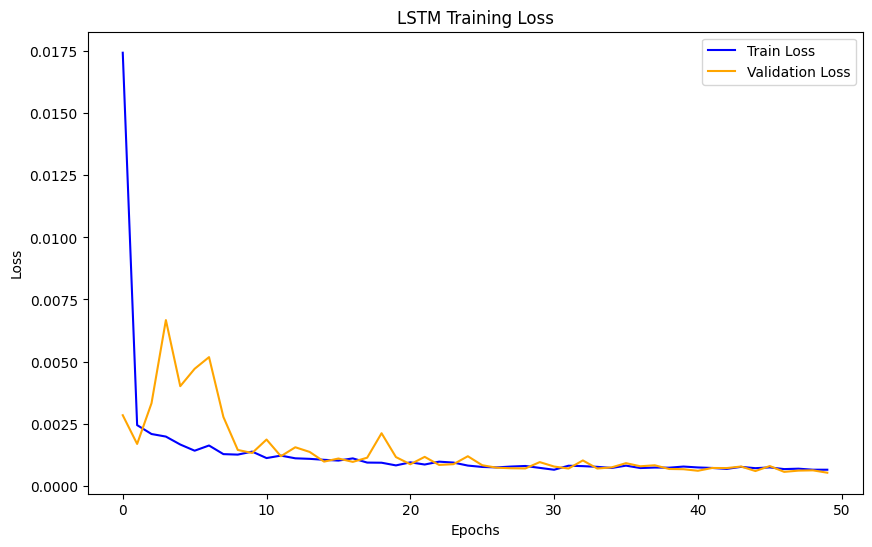

In [66]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Evaluate Model Performance**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Mean Absolute Error (MAE): 3.013984839547202
Root Mean Squared Error (RMSE): 4.036921648075701
R-squared (R²): 0.980757931476324


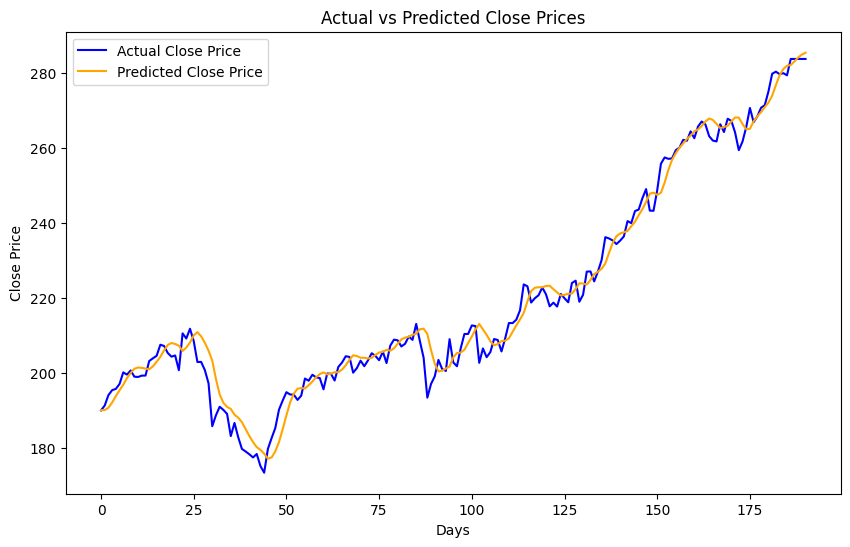

In [67]:
# Predict on test data
predictions = lstm_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)) 

# Evaluate the model
lstm_mae = mean_absolute_error(y_test_rescaled, predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
lstm_r2 = r2_score(y_test_rescaled, predictions)

print(f"\033[1mMean Absolute Error (MAE):\033[0m {lstm_mae}")
print(f"\033[1mRoot Mean Squared Error (RMSE):\033[0m {lstm_rmse}")
print(f"\033[1mR-squared (R²):\033[0m {lstm_r2}")

# Plot actual vs predicted close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(predictions, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Choose Best Model**


=== Model Performance Comparison ===

           Model         MAE        RMSE         R2
0          ARIMA   50.878127   60.552967  -2.185996
1         SARIMA  207.786404  210.553241 -37.521061
2        Prophet   27.326171   30.065477   0.214564
3        XGBoost    7.940157   16.344173   0.767887
4  Random Forest    8.666849   17.123544   0.745222
5           LSTM    3.013985    4.036922   0.980758


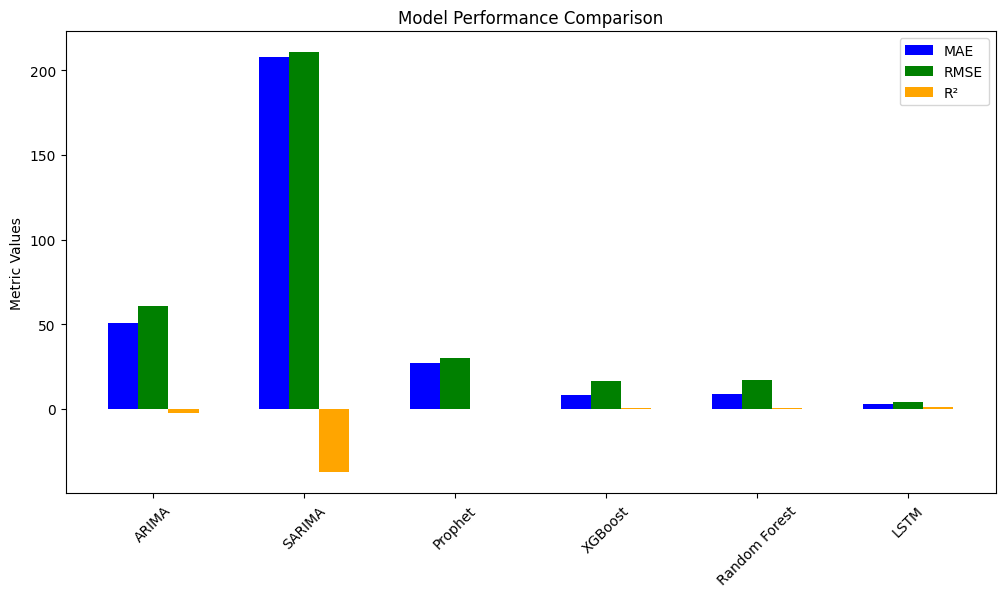

The best model is LSTM.



In [68]:
# Define the model performance dictionary
model_performance = {
    "ARIMA": {"MAE": arima_mae, "RMSE": arima_rmse, "R2": arima_r2},
    "SARIMA": {"MAE": sarima_mae, "RMSE": sarima_rmse, "R2": sarima_r2},
    "Prophet": {"MAE": prophet_mae, "RMSE": prophet_rmse, "R2": prophet_r2},
    "XGBoost": {"MAE": xgb_mae, "RMSE": xgb_rmse, "R2": xgb_r2},
    "Random Forest": {"MAE": rf_mae, "RMSE": rf_rmse, "R2": rf_r2},
    "LSTM": {"MAE": lstm_mae, "RMSE": lstm_rmse, "R2": lstm_r2}
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(model_performance, orient="index").reset_index()
results_df.rename(columns={"index": "Model"}, inplace=True)

# Display the dataframe
print("\n=== Model Performance Comparison ===\n")
print(results_df)

# Save results for reference
results_df.to_csv("model_performance_comparison.csv", index=False)

# Plot the updated performance comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df["Model"]))

ax.bar(x - 0.2, results_df["MAE"], width=0.2, label="MAE", color='blue')
ax.bar(x, results_df["RMSE"], width=0.2, label="RMSE", color='green')
ax.bar(x + 0.2, results_df["R2"], width=0.2, label="R²", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"])
ax.set_ylabel("Metric Values")
ax.set_title("Model Performance Comparison")
ax.legend()
plt.xticks(rotation=45)
plt.show()

# Select the best model: First by RMSE, then by MAE, and finally by R² 
best_model = results_df.sort_values(by=["RMSE", "MAE", "R2"], ascending=[True, True, False]).iloc[0]["Model"]

# Show the best model
print(f"\033[1mThe best model is {best_model}.\033[0m\n")


**Forecast Next 30 Days**


Forecasting next 30 days with LSTM
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━

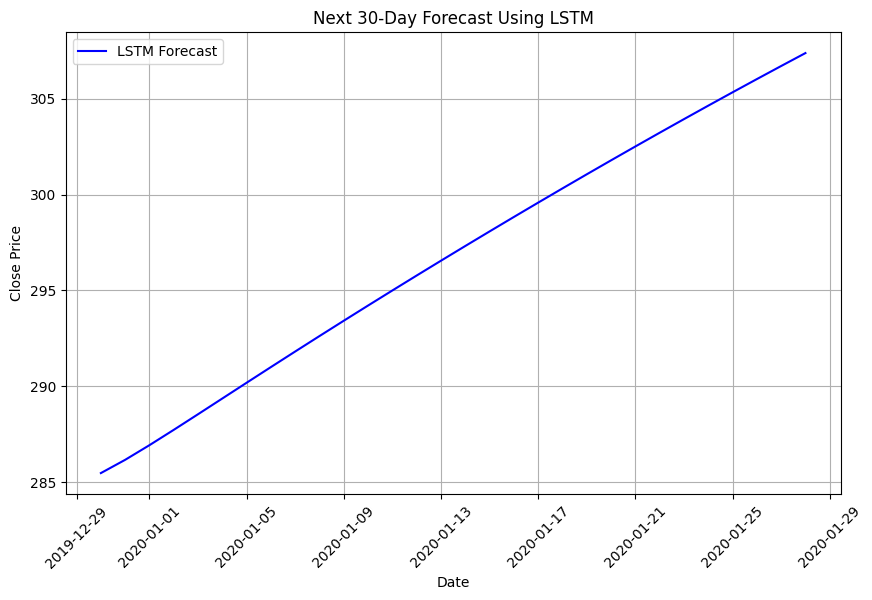

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map the Best Model to Its Trained Object
model_objects = {
    "LSTM": lstm_model,
    "Prophet": prophet_model,
    "ARIMA": arima_model,
    "SARIMA": sarima_model,
    "XGBoost": xgboost_model,
    "Random Forest": rf_model
}

# Ensure best_model is defined before proceeding
if "best_model" not in globals():
    raise NameError("Error: 'best_model' is not defined. Ensure model selection was performed correctly.")

# Retrieve the best model object
selected_model = model_objects[best_model]

# Generate future dates correctly (starting from the last test set date)
future_dates = pd.date_range(start=test.index[-1], periods=31, freq='D')[1:]

# Step 2: Forecast the Next 30 Days Using the Best Model
if best_model == "LSTM":
    print("\n\033[1mForecasting next 30 days with LSTM\033[0m")
    
    # Generate future dates for LSTM
    future_dates = pd.date_range(start=test['ds'].max(), periods=30, freq='D')
    
    # Extract the last available sequence from the training data
    last_sequence = X_test[-1]  
    
    # Reshape it to match LSTM input shape (1, sequence_length, features)
    X_future = np.expand_dims(last_sequence, axis=0)
    
    # Empty list to store predictions
    future_predictions = []

    for _ in range(30):  
        prediction = selected_model.predict(X_future)  
        future_predictions.append(prediction[0][0])  
        
        # Append prediction and remove the oldest time step (rolling window)
        X_future = np.roll(X_future, shift=-1, axis=1)
        X_future[0, -1, 0] = prediction  

    # Convert predictions back to original scale
    future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Store results in a DataFrame
    future_forecast_df = pd.DataFrame({'Date': future_dates, 'LSTM_Forecast': future_predictions_rescaled.flatten()})

    print(future_forecast_df)

elif best_model == "Prophet":
    print("\n\033[1mForecasting next 30 days with Prophet\033[0m")
    
    # Generate future DataFrame for Prophet
    future = selected_model.make_future_dataframe(periods=30, freq='D')
    
    # Predict next 30 days
    forecast = selected_model.predict(future)
    
    # Extract only future forecast values
    future_forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

elif best_model in ["ARIMA", "SARIMA"]:
    print(f"\n\033[1mForecasting next 30 days with {best_model}\033[0m")
    
    # Forecast next 30 days
    forecast_values = selected_model.forecast(steps=30)

    # Store results in DataFrame
    future_forecast_df = pd.DataFrame({'Date': future_dates, f'{best_model}_Forecast': forecast_values})

elif best_model in ["XGBoost", "Random Forest"]:
    print(f"\n\033[1mForecasting next 30 days with {best_model}\033[0m")

    # Prepare input features (use last row and roll forward)
    last_features = X_test.iloc[-1].values.reshape(1, -1)  

    future_predictions = []
    
    for _ in range(30):  
        prediction = selected_model.predict(last_features)  
        future_predictions.append(prediction[0])  

        # Shift features forward
        last_features = np.roll(last_features, shift=-1, axis=1)
        last_features[0, -1] = prediction  

    # Store results in DataFrame
    future_forecast_df = pd.DataFrame({'Date': future_dates, f'{best_model}_Forecast': future_predictions})

# Step 3: Visualize Future Forecast
plt.figure(figsize=(10, 6))
if best_model == "LSTM":
    plt.plot(future_forecast_df['Date'], future_forecast_df['LSTM_Forecast'], label="LSTM Forecast", color="blue")
elif best_model == "Prophet":
    plt.plot(future_forecast_df['ds'], future_forecast_df['yhat'], label="Prophet Forecast", color="green")
    plt.fill_between(
        future_forecast_df['ds'], 
        future_forecast_df['yhat_lower'], 
        future_forecast_df['yhat_upper'], 
        color="green", alpha=0.2, label="Confidence Interval"
    )
else:
    plt.plot(future_forecast_df['Date'], future_forecast_df.iloc[:, 1], label=f"{best_model} Forecast", color="red")

plt.title(f"Next 30-Day Forecast Using {best_model}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

# # Display Forecasted Data
# print("\n\033[1mForecasted Stock Prices for Next 30 Days:\033[0m")
# print(future_forecast_df) 


In [70]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# Save the scaler correctly
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [71]:
from tensorflow.keras.models import load_model

# Save the trained LSTM model
lstm_model.save('lstm_model.h5')

# Load the saved LSTM model
lstm_model = load_model('lstm_model.h5')
